# Machine Learning for Everybody – Full Course

Resource: [Machine learning for everybody](https://youtu.be/i_LwzRVP7bg?si=pd9spd0CrkbW6yTN)

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [191]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [192]:
df["class"] = (df["class"] == "g").astype(int)

In [193]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

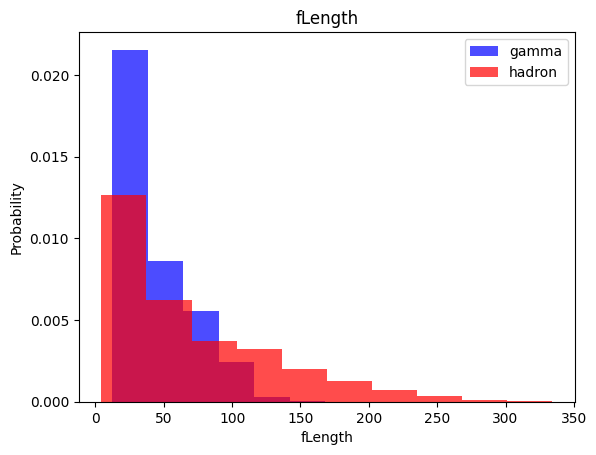

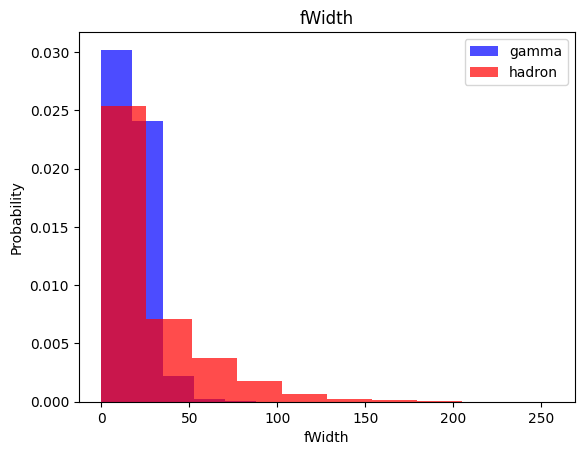

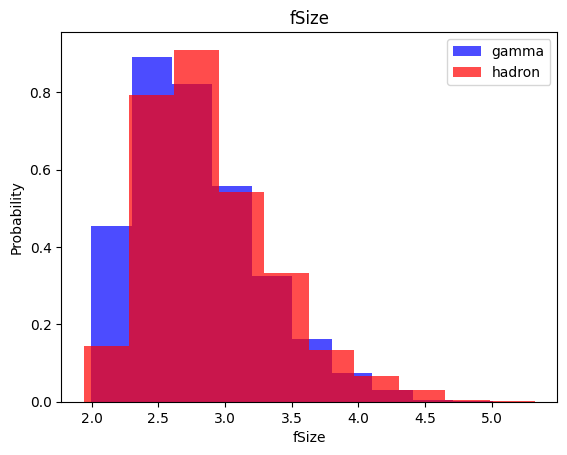

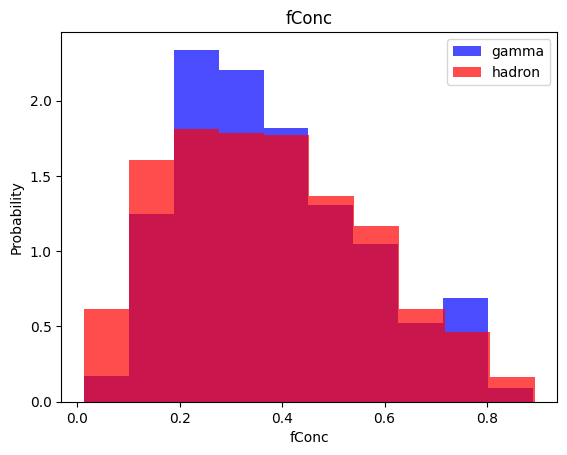

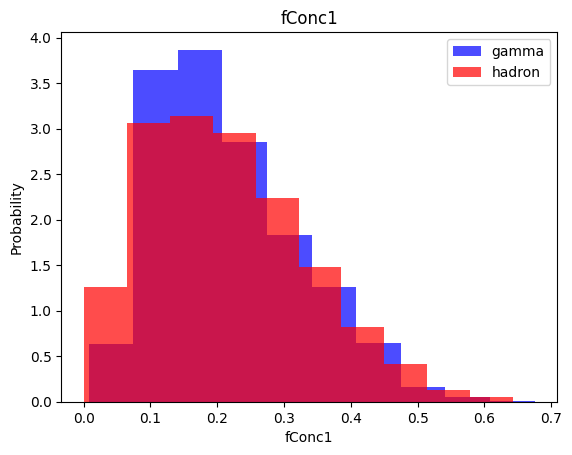

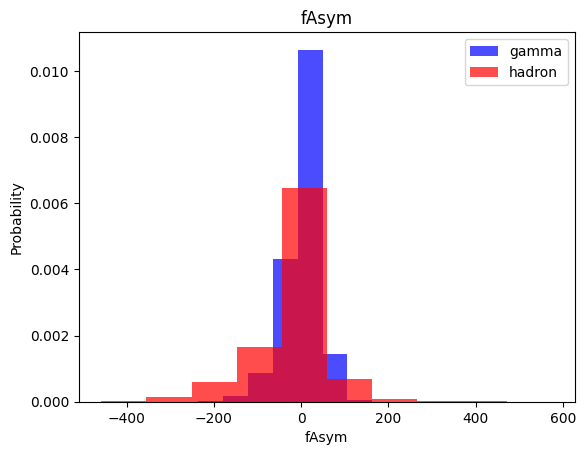

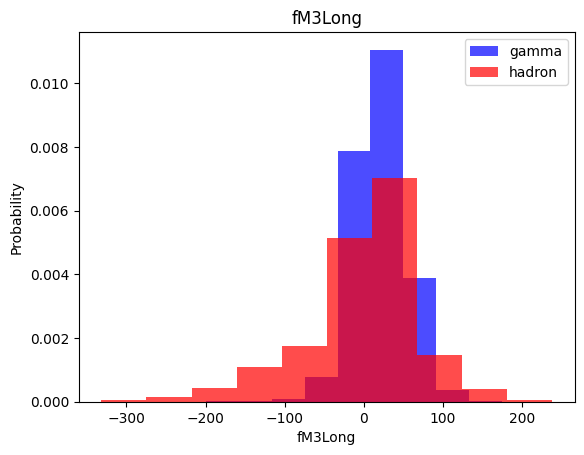

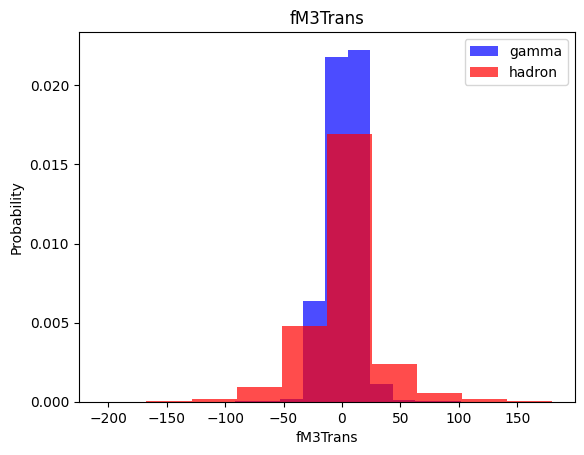

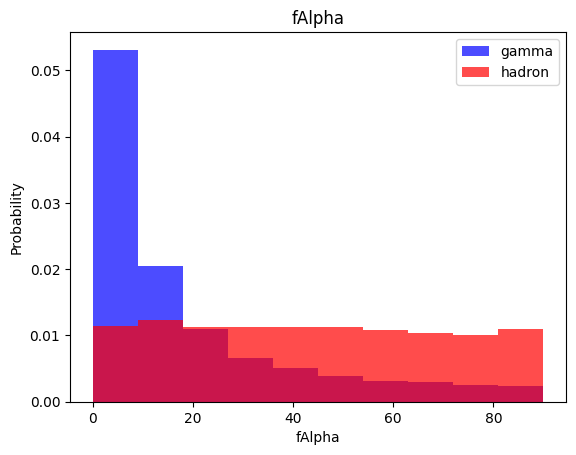

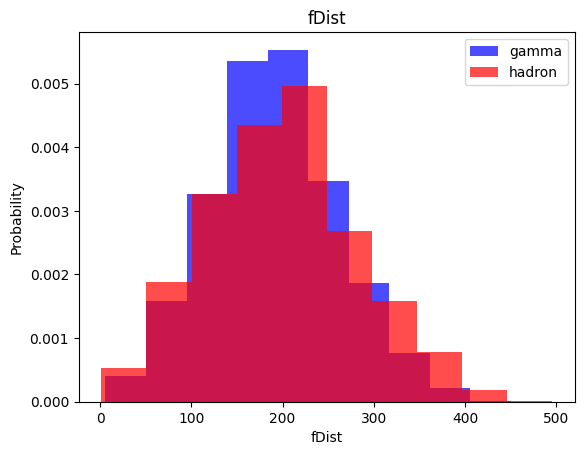

In [194]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Data processing

Create train, test, validation dataset
- train: model is trained on this dataset
- test: model updates its parameters while training with this dataset
- validation: after training, we compute the accuracy of our model with this dataset

Preprocessing dataset to scale the classes: class 0 has much lesser data compared to class 1, so we augment the data.

In [195]:
# We see that fAlpha has the most difference between the classes
# create train, validation and test dataset

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\Prajwal Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [196]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [197]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7437
3975


In [198]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

***

# K - nearest neighbours
Computes the eucledian distance between the points
$$d = \sqrt{(x_1 - x_2)^2 + (y_1-y_2)^2}$$

In [199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [200]:
knn_model = KNeighborsClassifier(n_neighbors=1) # increase neighbors to look for more points
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [201]:
y_pred = knn_model.predict(X_test)

# Precision, Recall, f1 Score

Out of the ones we have labeled as positive, how many of them are true positives

$$ \text{Precision} = \frac{\text{True positives}}{\text{True positives} + \text{False positives}} $$

Out of all the ones that we know are truly positve, how many did we actually get right 

$$ \text{Recall} = \frac{\text{True positives}}{\text{True positives} + \text{True negatives}} $$

$$ \text{F1 score} =  \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1333
           1       0.83      0.89      0.85      2471

    accuracy                           0.80      3804
   macro avg       0.79      0.77      0.78      3804
weighted avg       0.80      0.80      0.80      3804



***

# Naive Bayes
Refer notes from the book for proofs

Bayes Formula

$$P(C_k|X) = \frac{P(X|C_k) \cdot P(C_k)}{P(X)}$$

Naive Bayes Rule

$$P(C_k|x_1, x_2, \dotsc x_n) \propto P(C_k) \prod_{i=1}^n P(x_i|C_k)$$

$\hat{y}$ : Predicting y by argmax

$$\hat{y} = \underset{k\in\{1, k\}}{\operatorname{argmax}} P(C_k) \prod_{i=1}^n P(x_i|C_k)$$

$\hat{y}$ : MAP: Maximum A Posteriori


In [203]:
from sklearn.naive_bayes import GaussianNB

In [204]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [205]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1333
           1       0.73      0.90      0.81      2471

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



***

# Logistic Regression

$$\hat{y} = mx+b$$

How can we model probability?
value of $mx+b$ can range between $-\infty$ to $+\infty$. But probability must be in the range of $0$ and $1$. To do this we take $\frac{p}{1-p}$. it can still have $\pm$ sign, so we take $\log$

$$\ln \frac{p}{1-p} = mx + b$$

Take exponent,

$$
\begin{aligned}
e^{\ln \frac{p}{1-p}} &= e^{mx + b} \\

\frac{p}{1-p} &= e^{mx + b}\\

p &= (1-p) e^{mx + b}\\

p &= e^{mx + b} - p e^{mx + b}\\

p + p e^{mx + b} &= e^{mx + b}\\

p (1 + e^{mx + b}) &= e^{mx + b}\\

p  &= \frac{e^{mx + b}}{1 + e^{mx + b}}
\end{aligned}
$$

Multiply and divide by $-e^{mx+b}$

$$
\begin{aligned}
p &= \frac{e^{mx + b}}{1 + e^{mx + b}} \cdot \frac{e^{-(mx+b)}}{e^{-(mx+b)}}\\

 &= \frac{1}{1 + e^{-(mx + b)}}
\end{aligned}
$$

This is the sigmoid function. This is non linear

$$S(x) = \frac{1}{1+e^{-y}}$$

Logistic regression is trying to fit our data to the sigmoid function


In [206]:
from sklearn.linear_model import LogisticRegression

In [207]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [208]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1333
           1       0.84      0.82      0.83      2471

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



***

# Support Vector Machine
Finding the best line (hyperplane) that separates the data.

Sometimes we have to project the data to a different dimension linearly to find the best line. For example if the data lies in $x$, we can project the data between $x$ and $x^2$ and maybe we can find the best fitting hyperplane (Kernel Trick). _Interesting trick_

In [209]:
from sklearn.svm import SVC #Support Vector Classifier

In [210]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [211]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1333
           1       0.89      0.90      0.89      2471

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



***

# Neural Networks (Using tensorflow)

In [212]:
import tensorflow as tf
import keras

In [213]:
def plot_history(history, title=""):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary corssentropy")
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    ax2.grid(True)
    fig.suptitle(title)
    plt.show()

In [214]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = keras.models.Sequential([
        keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        keras.layers.Dropout(dropout_prob),
        keras.layers.Dense(num_nodes, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=keras.optimizers.Adam(lr), loss="binary_crossentropy", metrics=['accuracy'])

    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), verbose=0)

    return nn_model, history

c:\Users\Prajwal Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


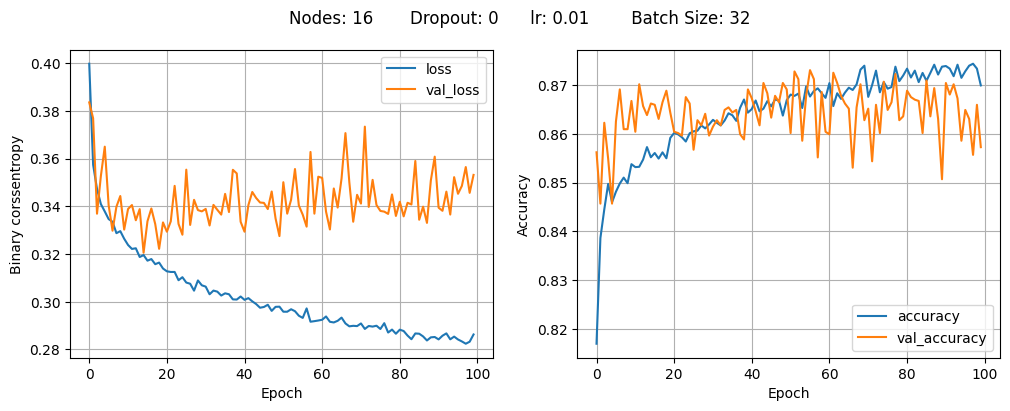

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.8650 - loss: 0.3392


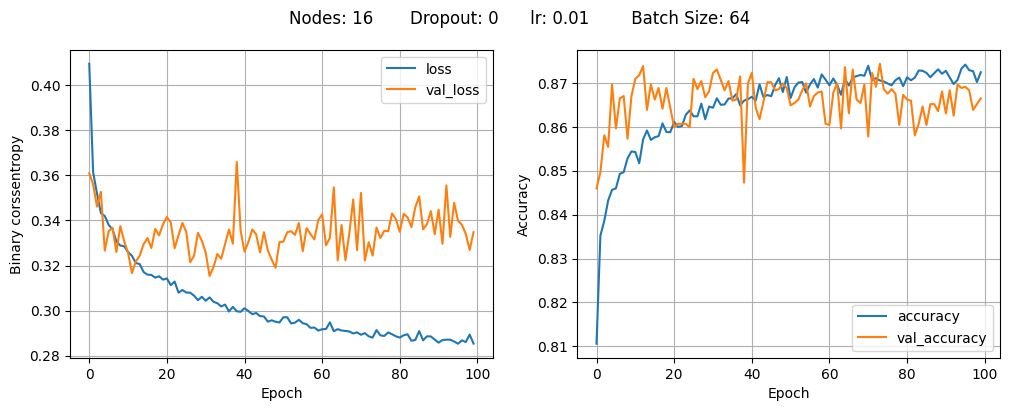

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.8723 - loss: 0.3213


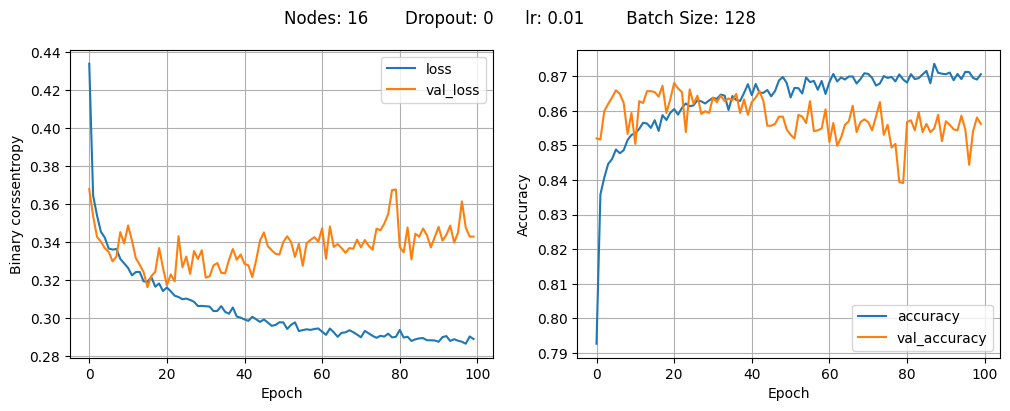

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.8669 - loss: 0.3278


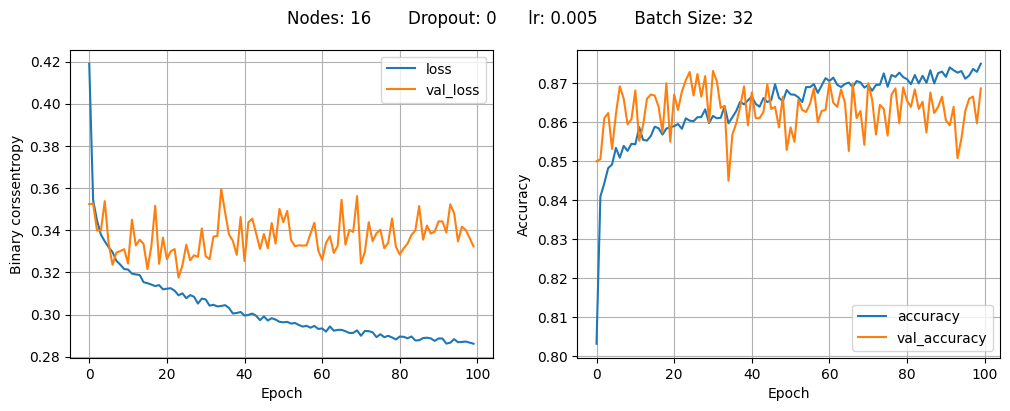

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8745 - loss: 0.3227


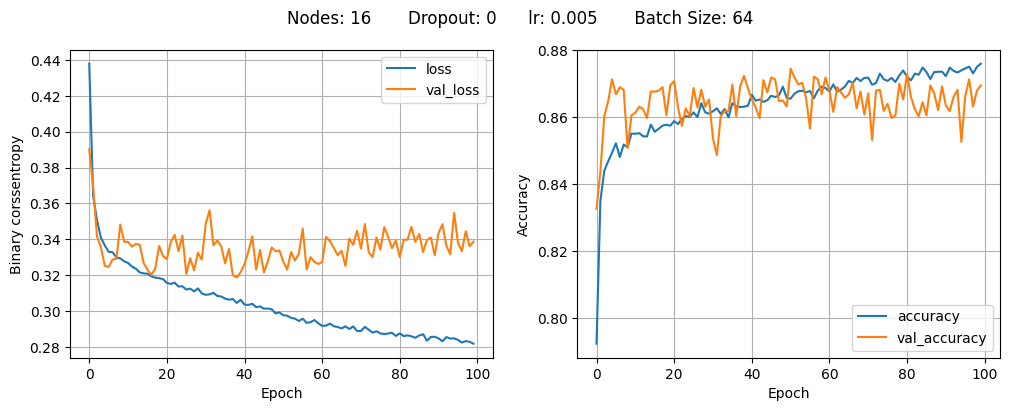

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.8759 - loss: 0.3240


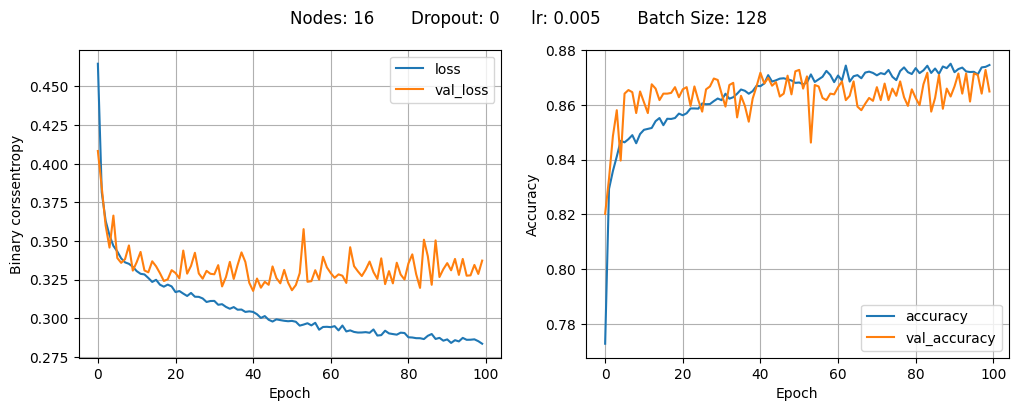

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8720 - loss: 0.3356


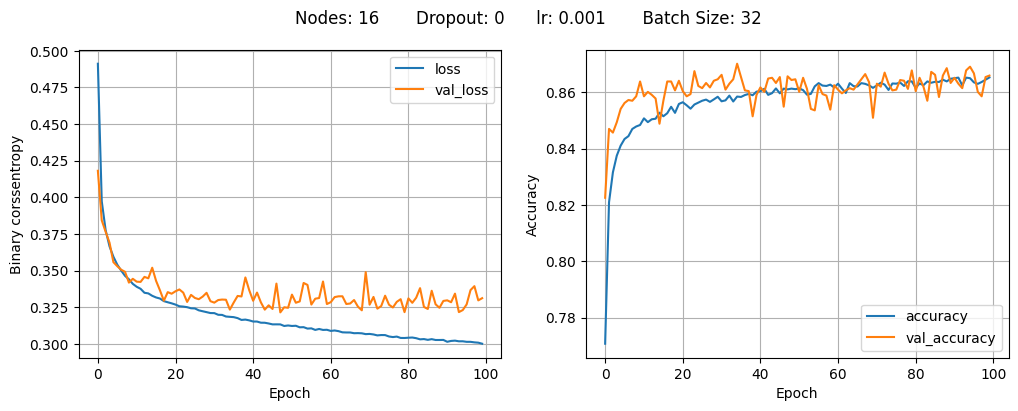

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.8744 - loss: 0.3211


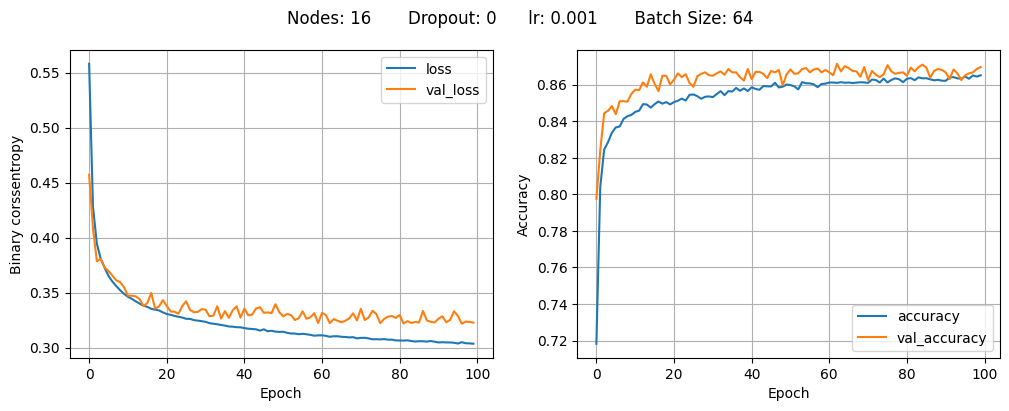

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.8774 - loss: 0.3144


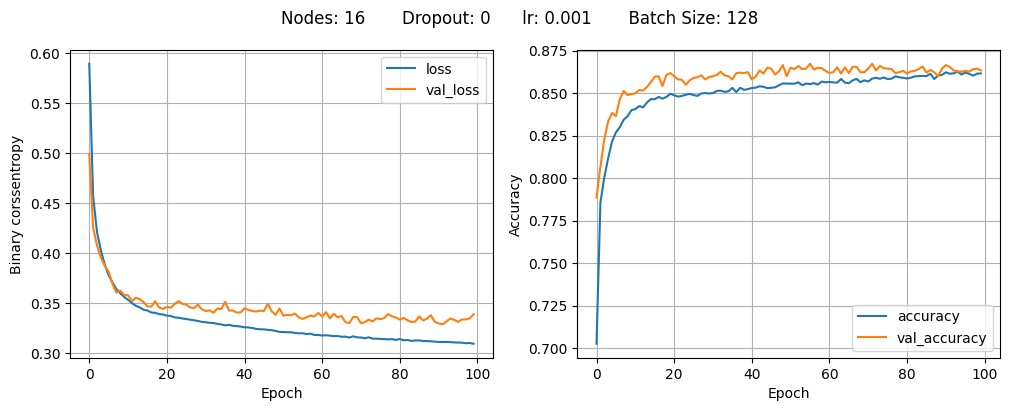

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8723 - loss: 0.3266


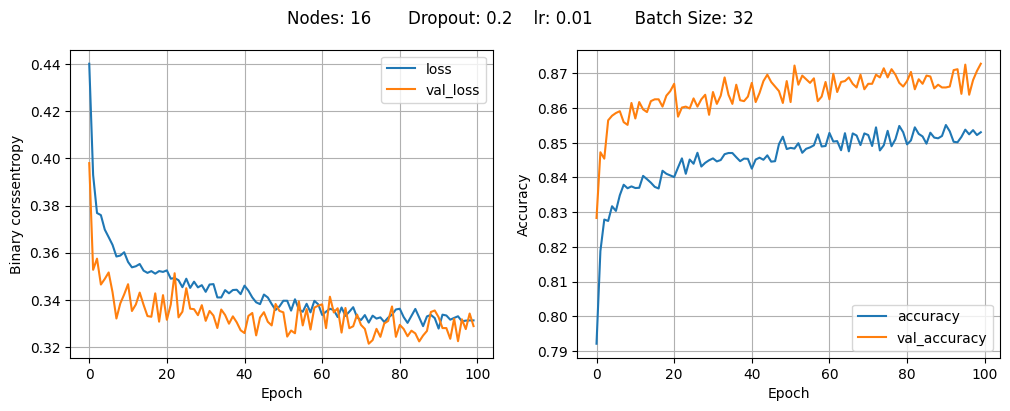

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.8848 - loss: 0.3188


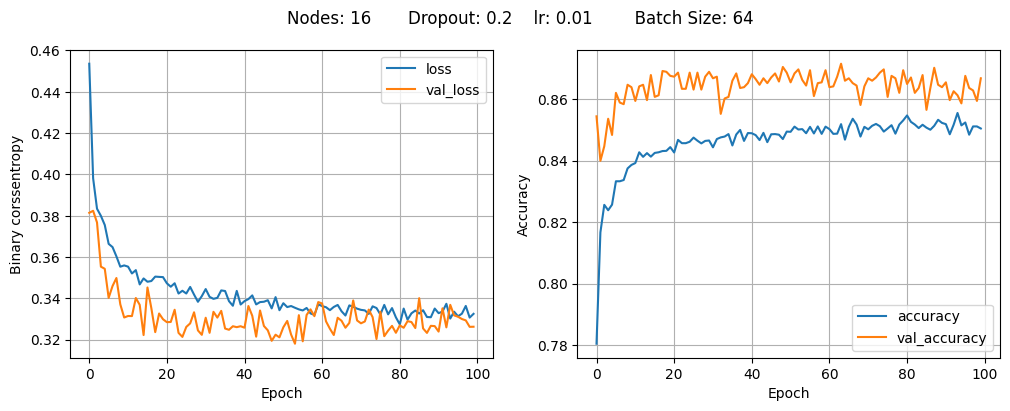

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.8780 - loss: 0.3133


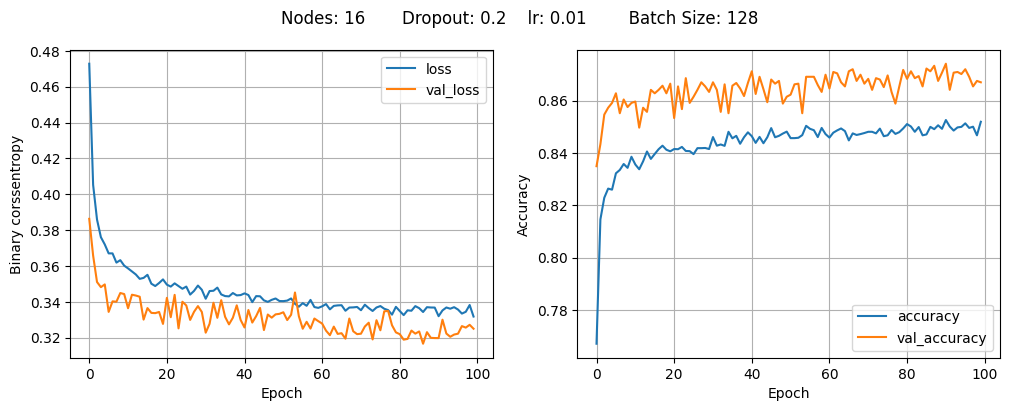

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.8755 - loss: 0.3173


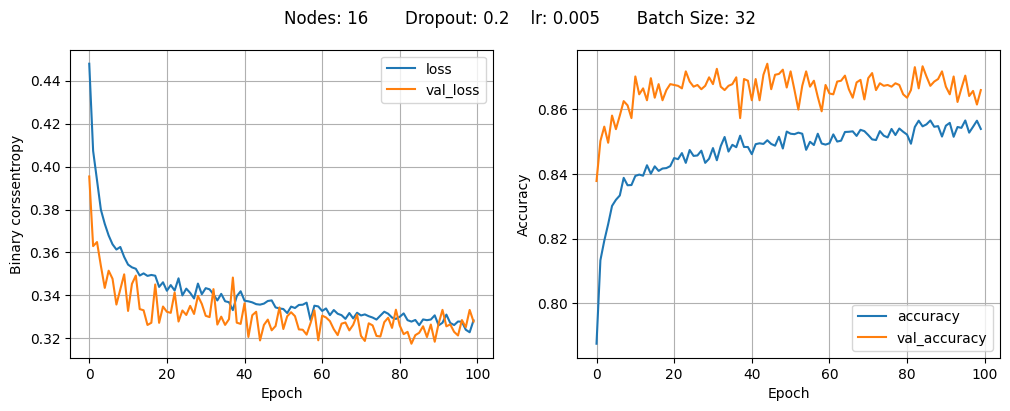

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8767 - loss: 0.3142


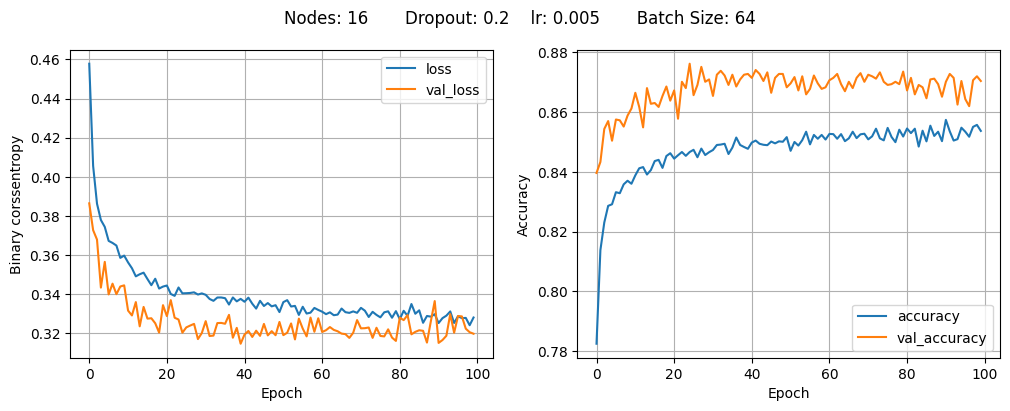

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.8731 - loss: 0.3155


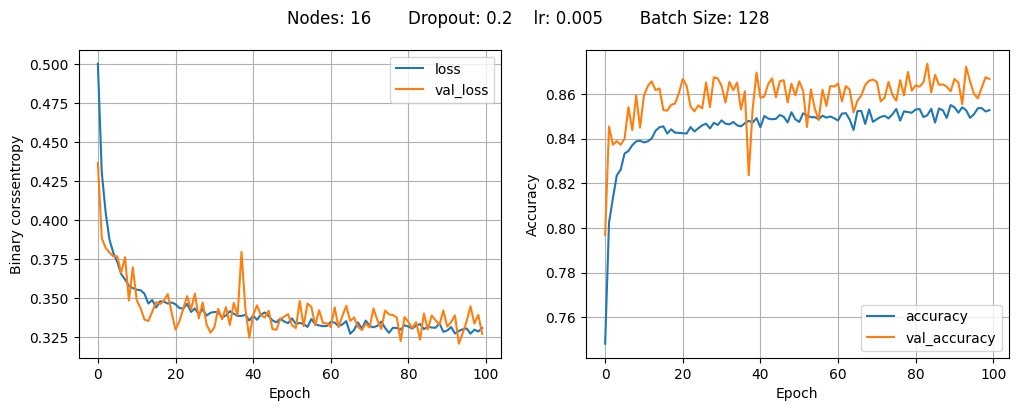

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.8778 - loss: 0.3169


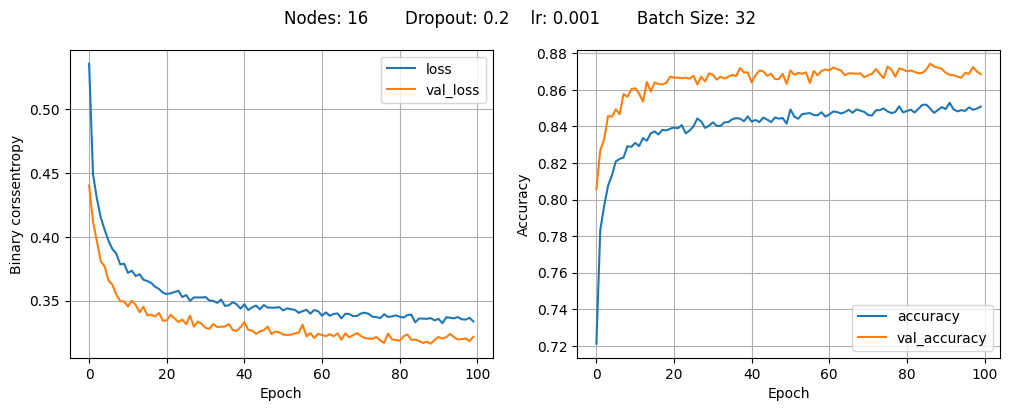

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.8744 - loss: 0.3111


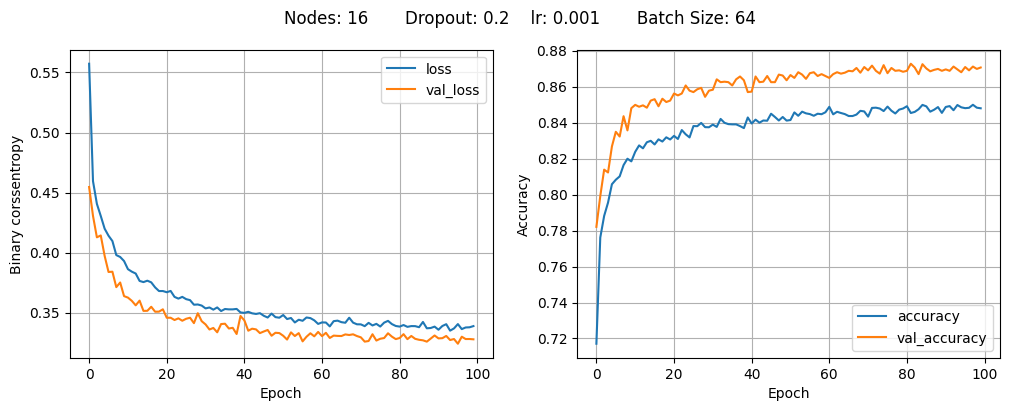

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8773 - loss: 0.3183


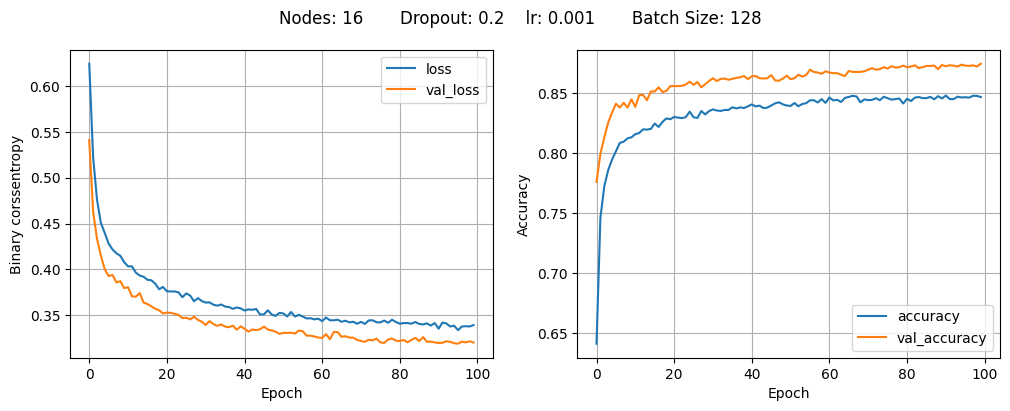

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8825 - loss: 0.3099


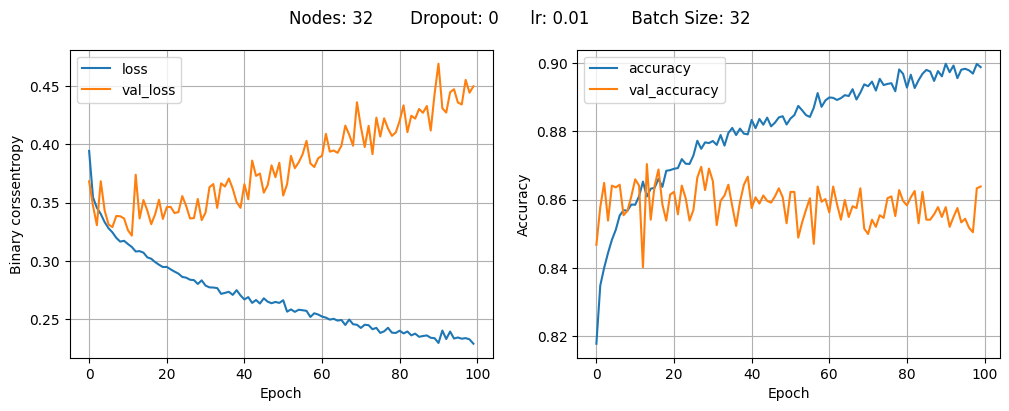

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.8735 - loss: 0.4344


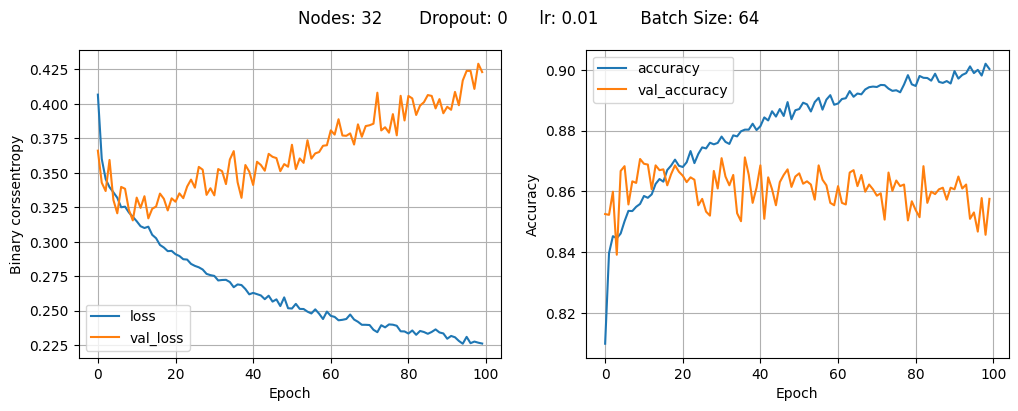

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8669 - loss: 0.4056


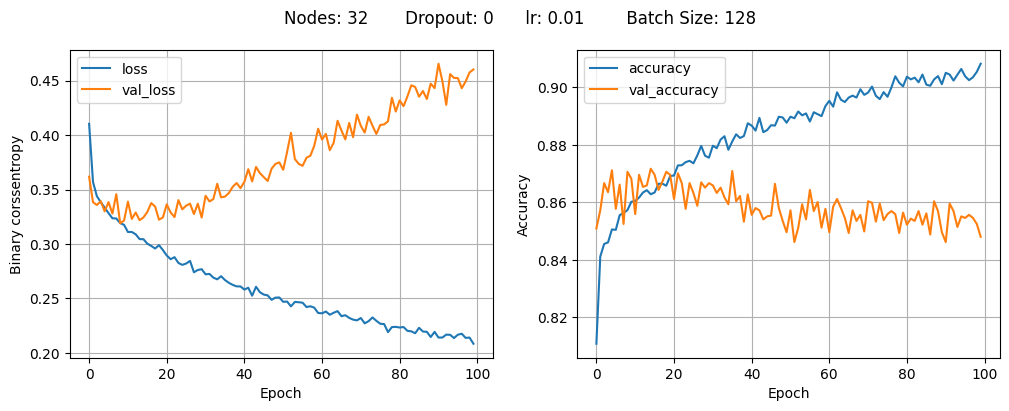

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.8584 - loss: 0.4358


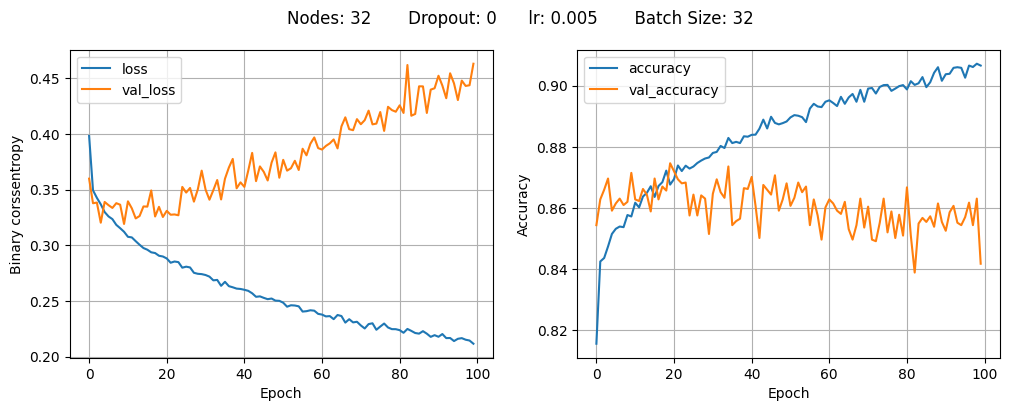

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.8455 - loss: 0.4505


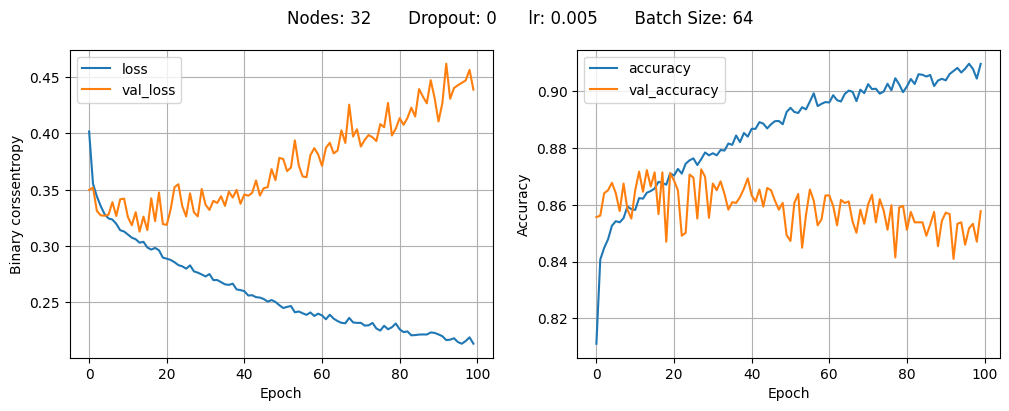

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.8659 - loss: 0.4175


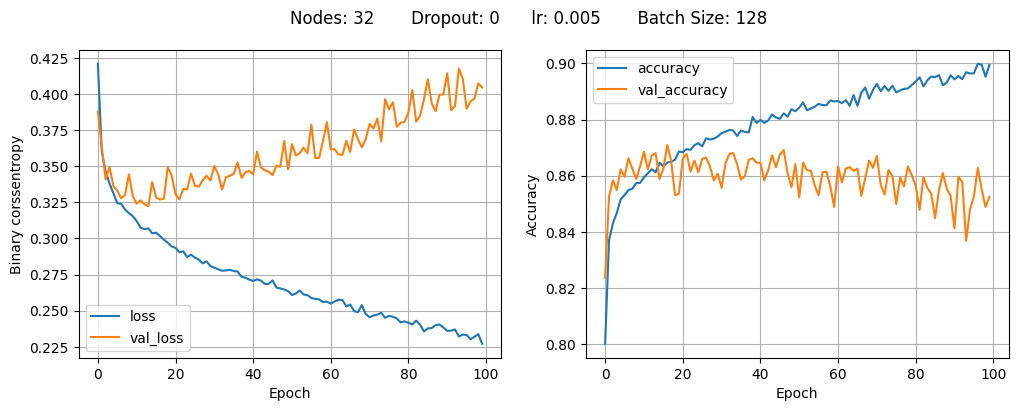

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.8559 - loss: 0.3956


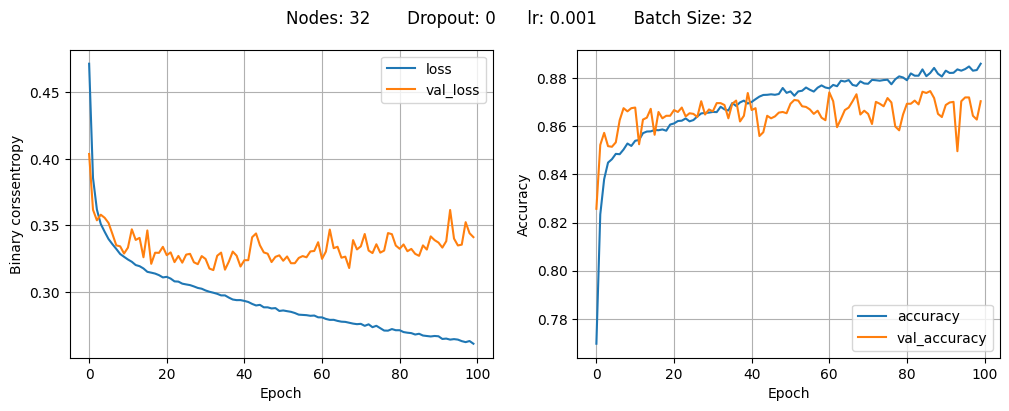

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.8785 - loss: 0.3306


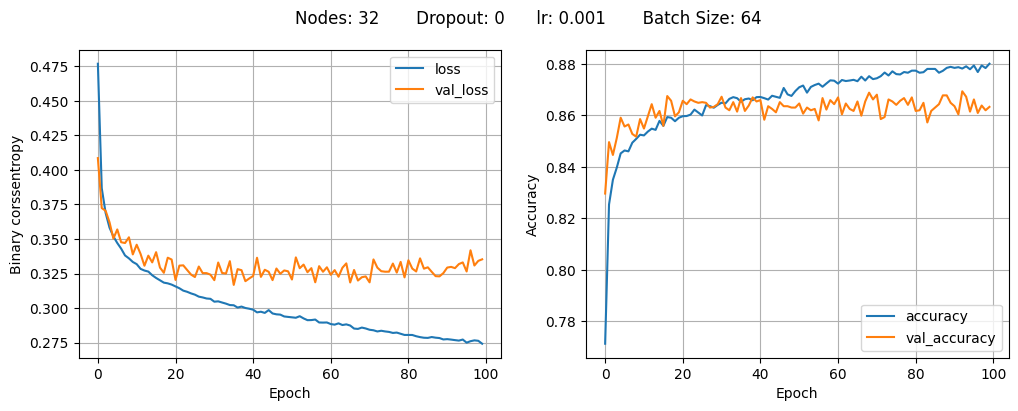

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.8708 - loss: 0.3236


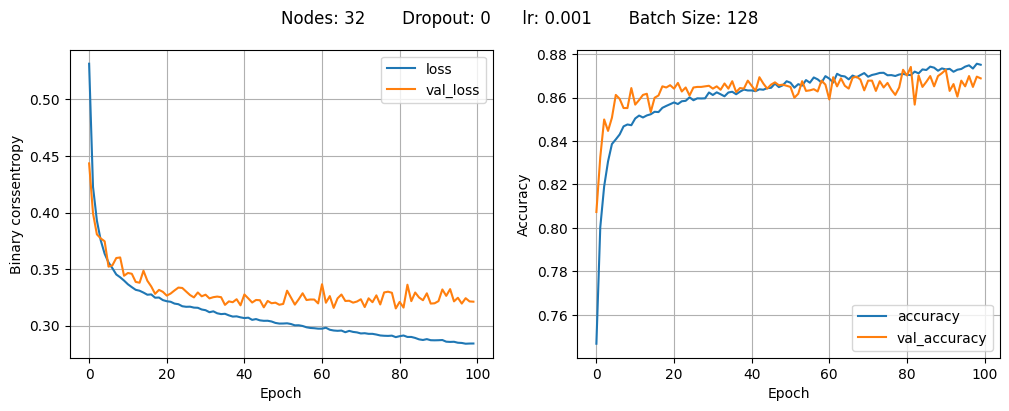

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.8748 - loss: 0.3119


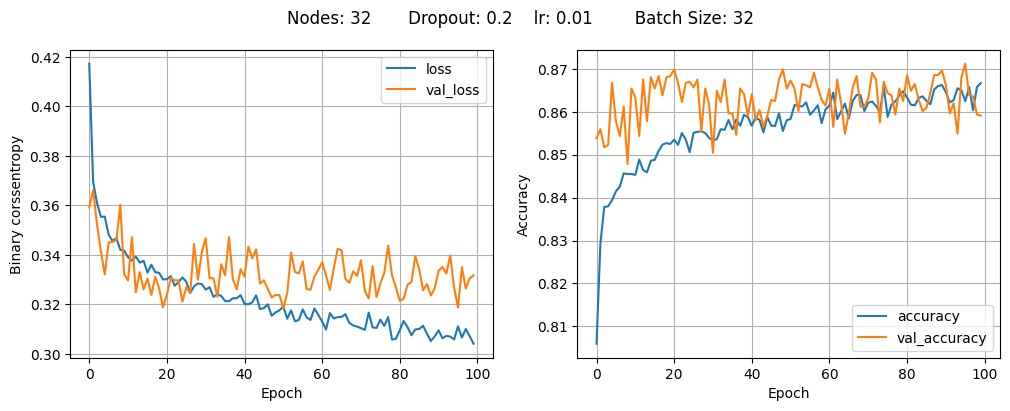

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.8682 - loss: 0.3206


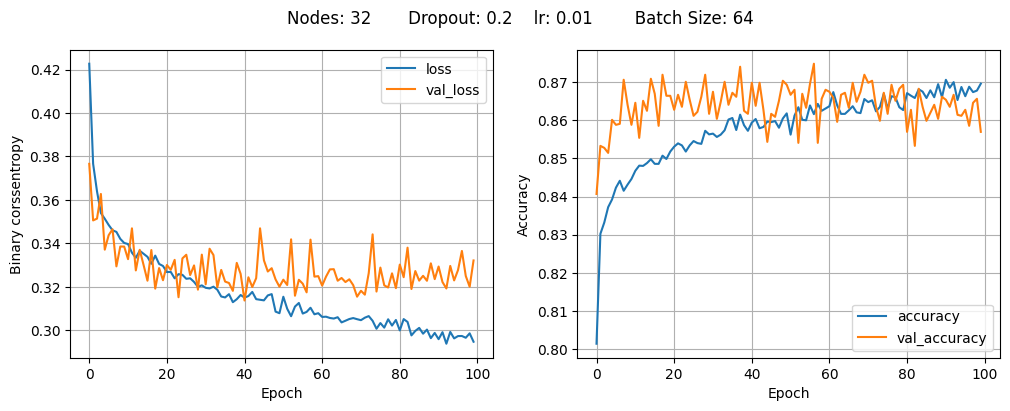

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.8665 - loss: 0.3189


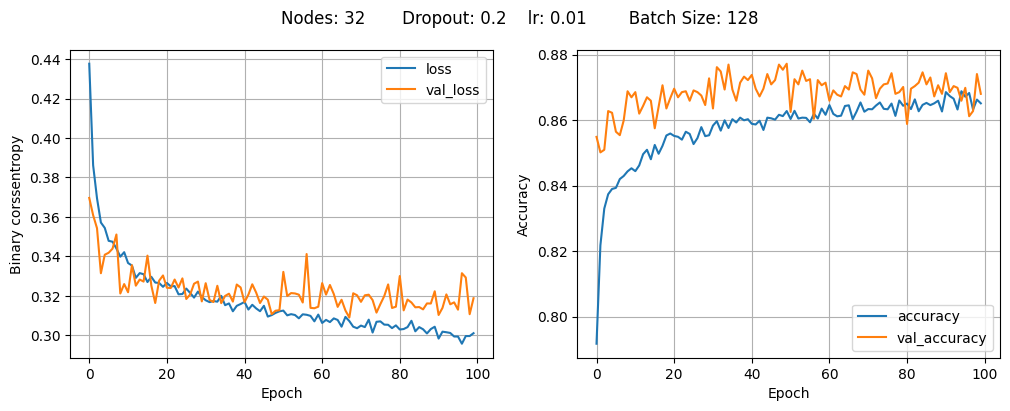

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.8722 - loss: 0.3114


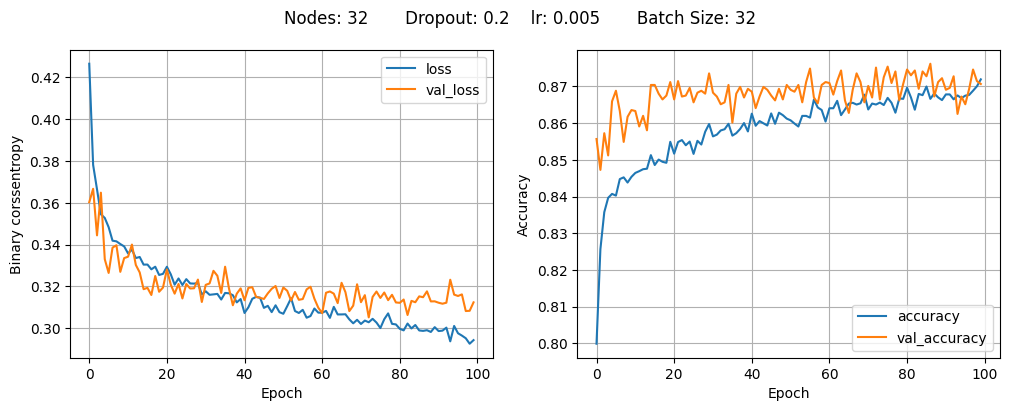

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.8774 - loss: 0.3022


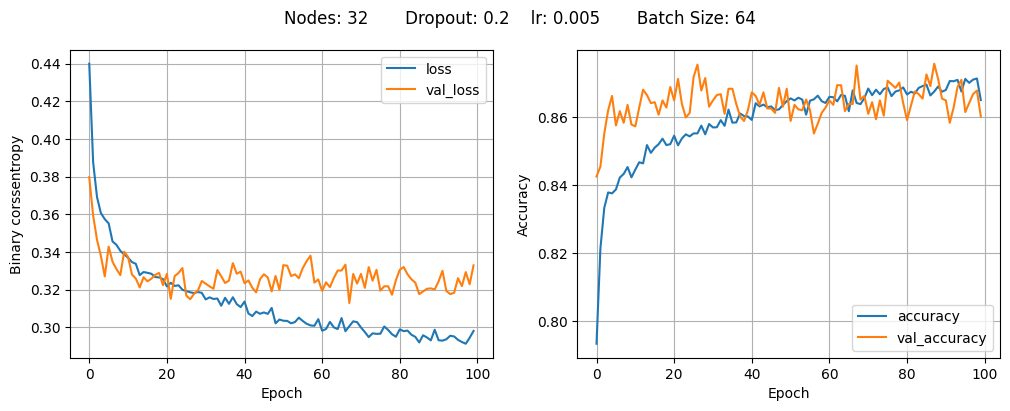

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.8683 - loss: 0.3196


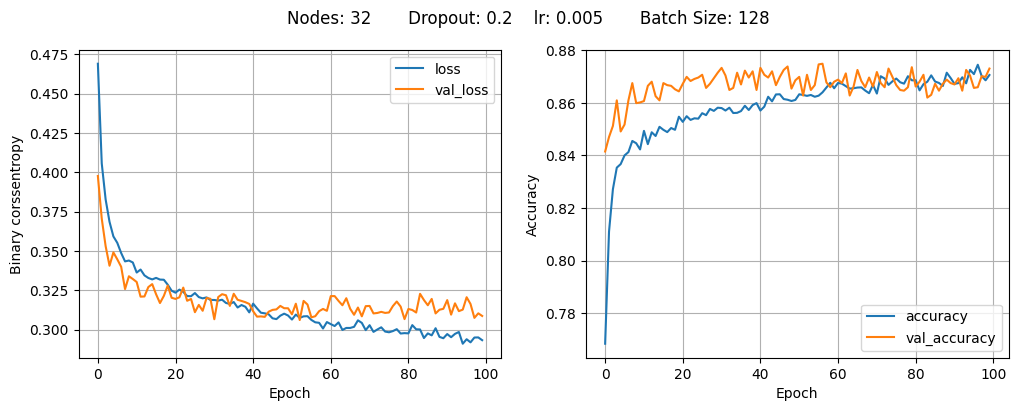

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.8778 - loss: 0.2958


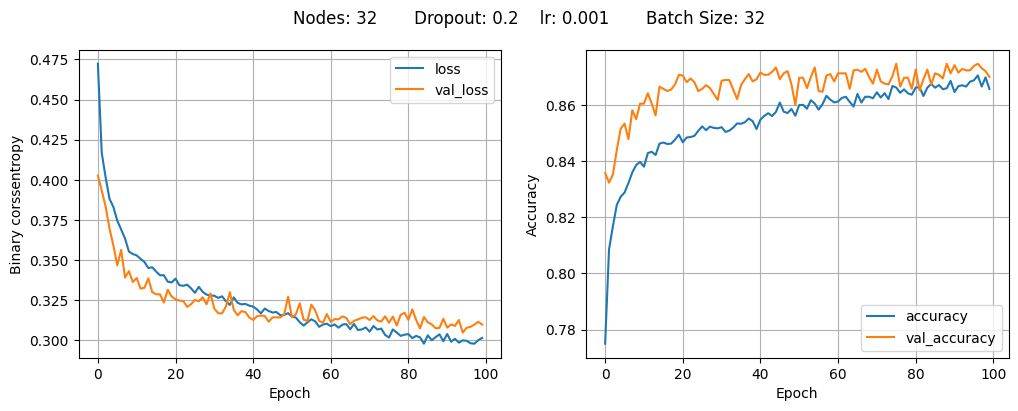

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.8812 - loss: 0.2975


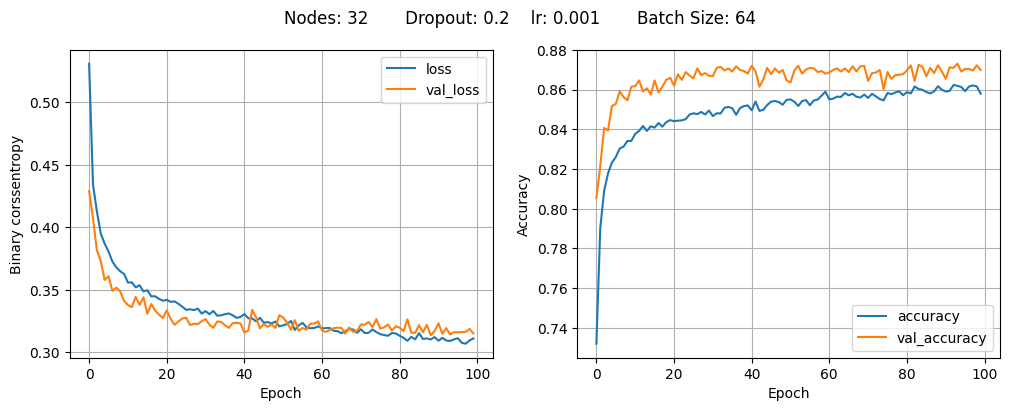

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.8756 - loss: 0.3065


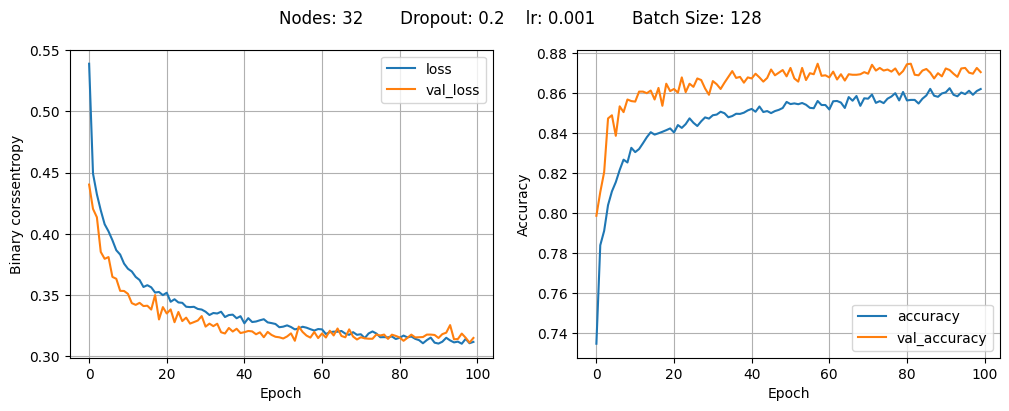

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.8823 - loss: 0.3041


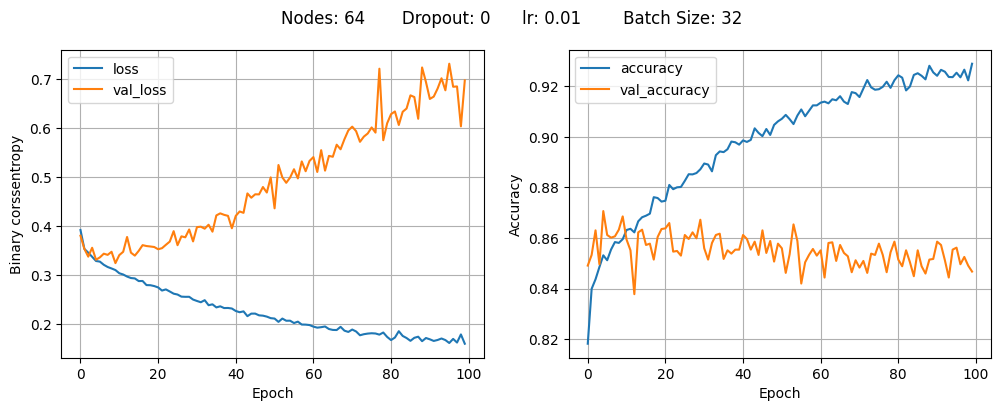

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.8539 - loss: 0.6789


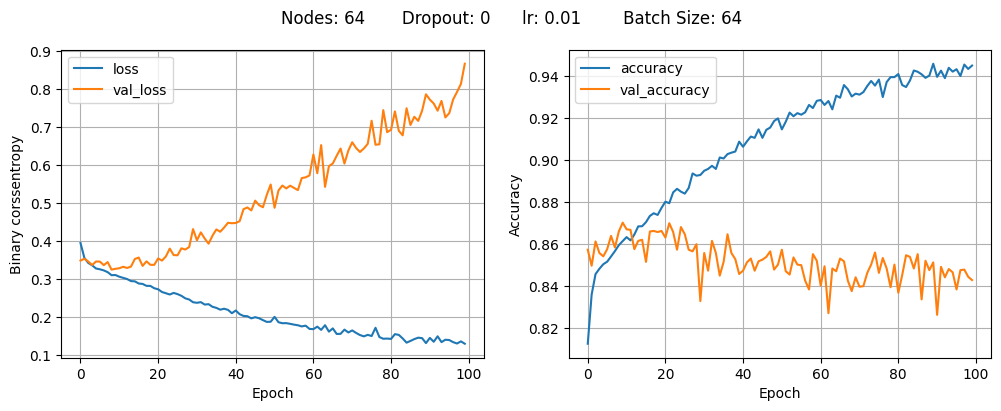

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.8480 - loss: 0.8252


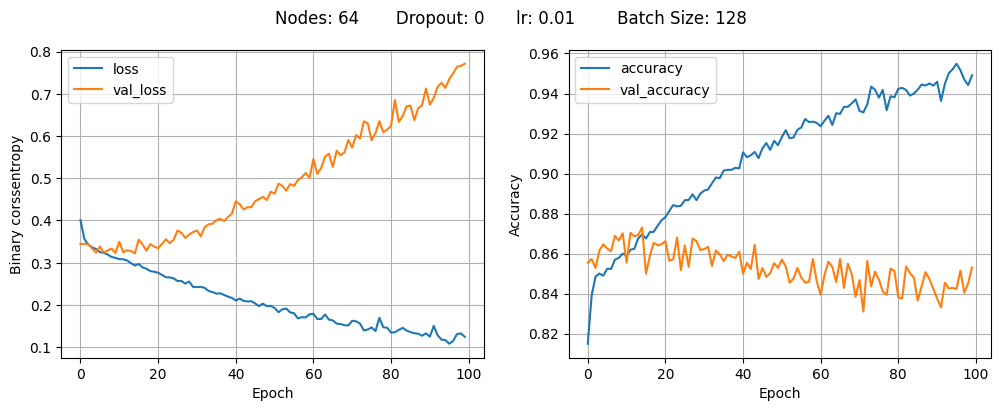

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.8623 - loss: 0.7256


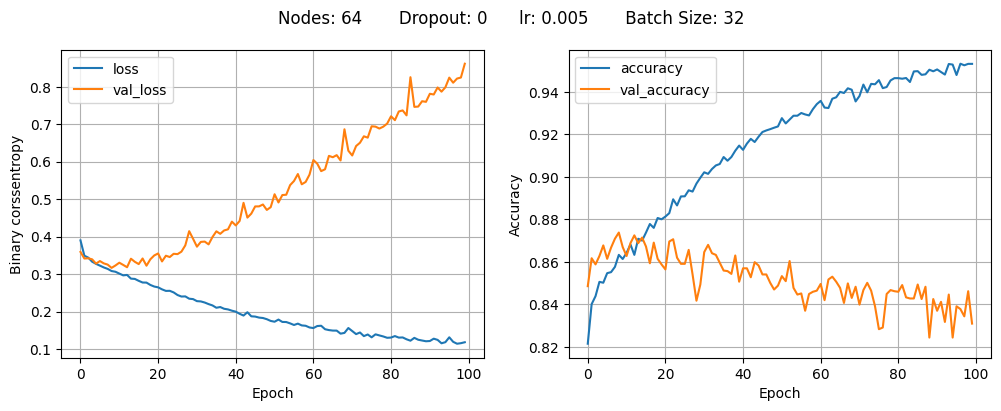

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.8368 - loss: 0.8471


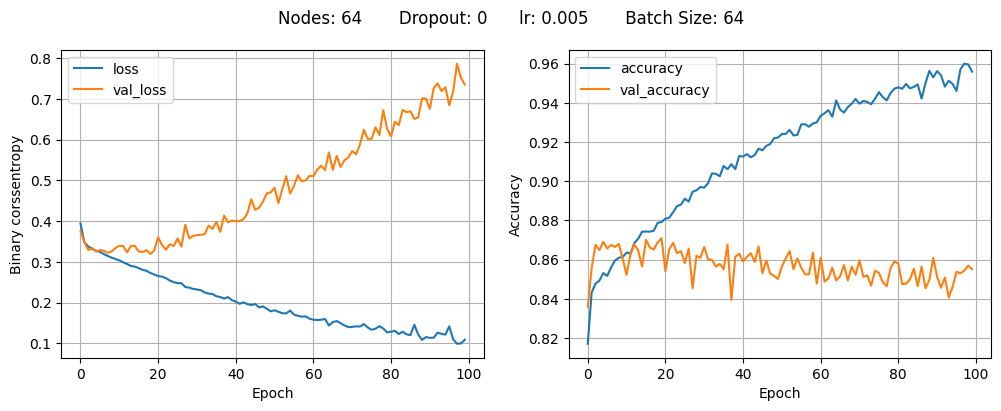

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.8566 - loss: 0.7414


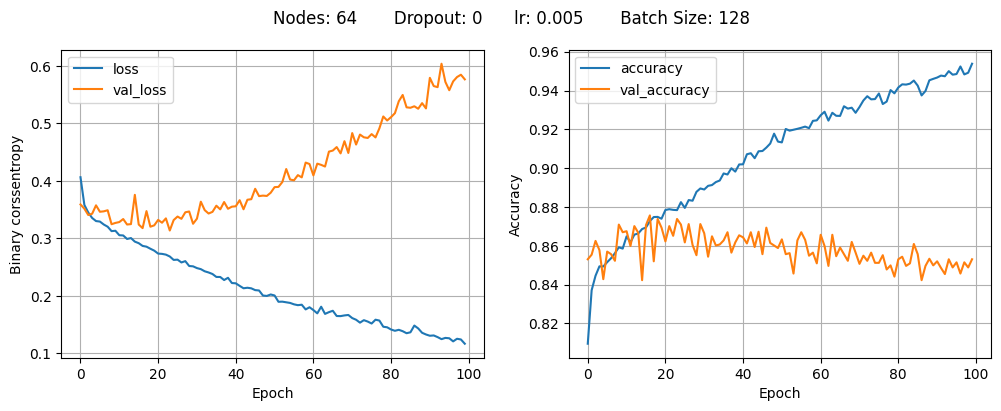

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.8642 - loss: 0.5288


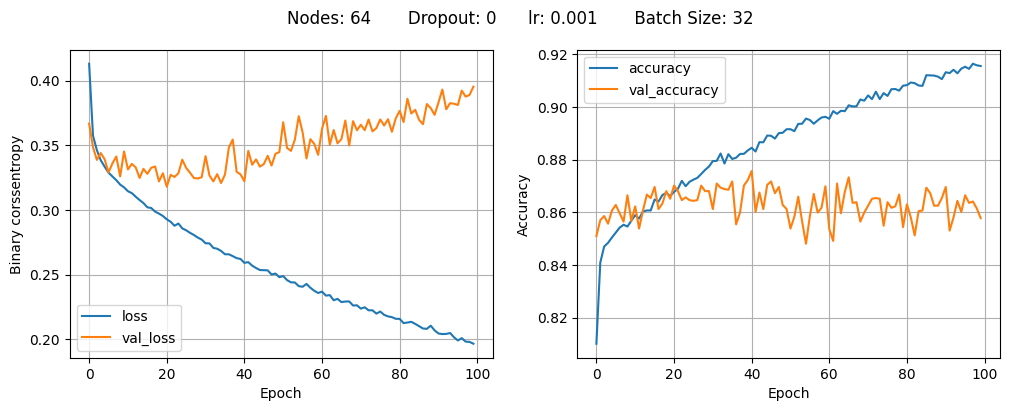

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.8656 - loss: 0.3885


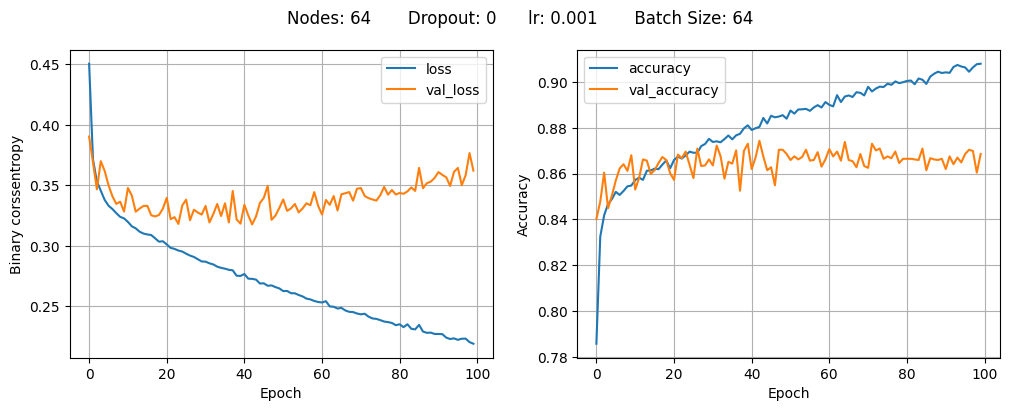

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.8788 - loss: 0.3451


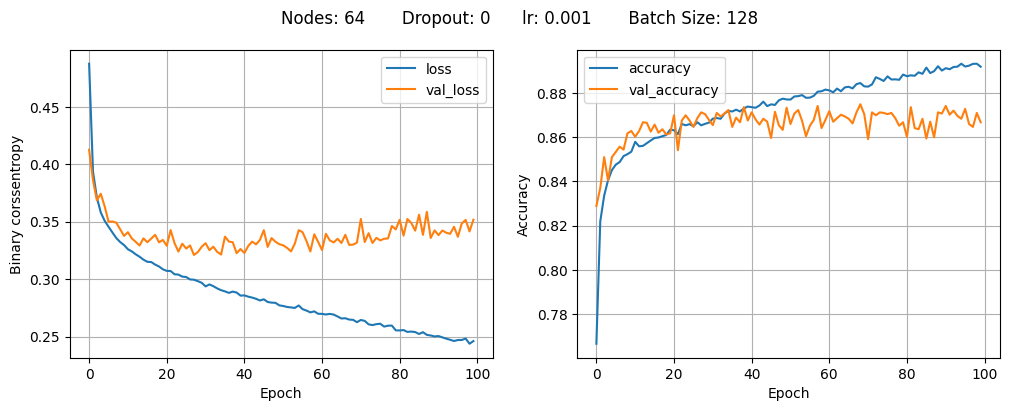

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.8740 - loss: 0.3440


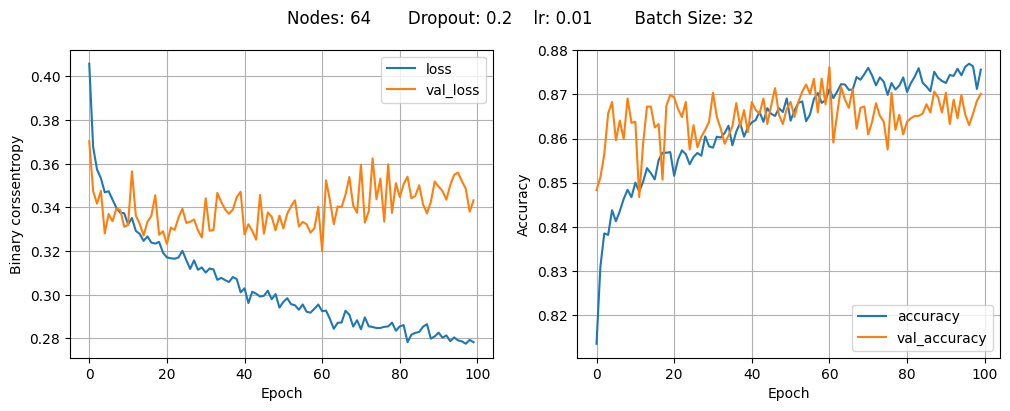

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8815 - loss: 0.3274


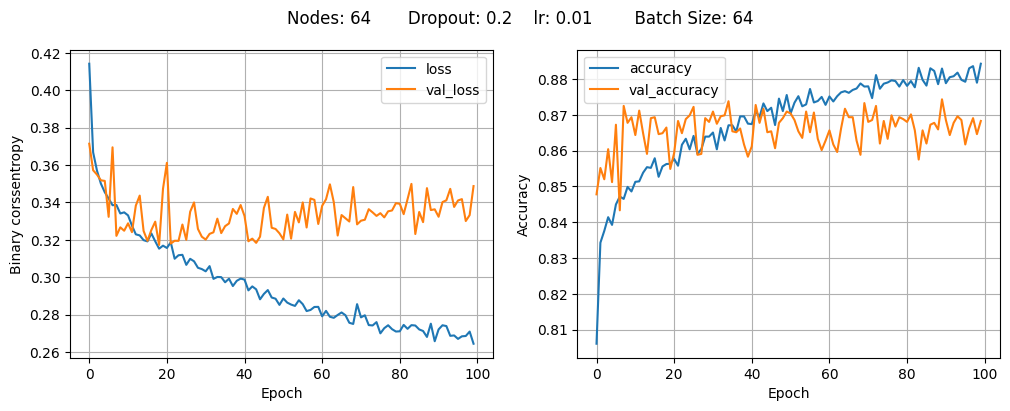

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.8778 - loss: 0.3369


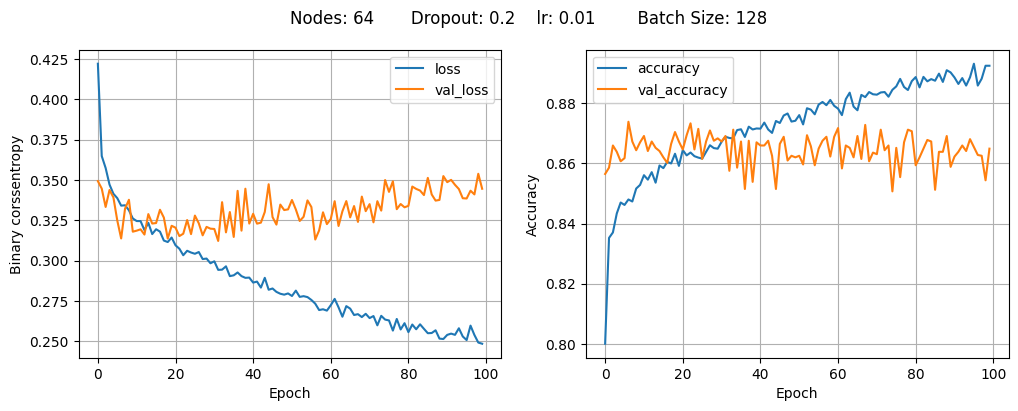

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.8724 - loss: 0.3305


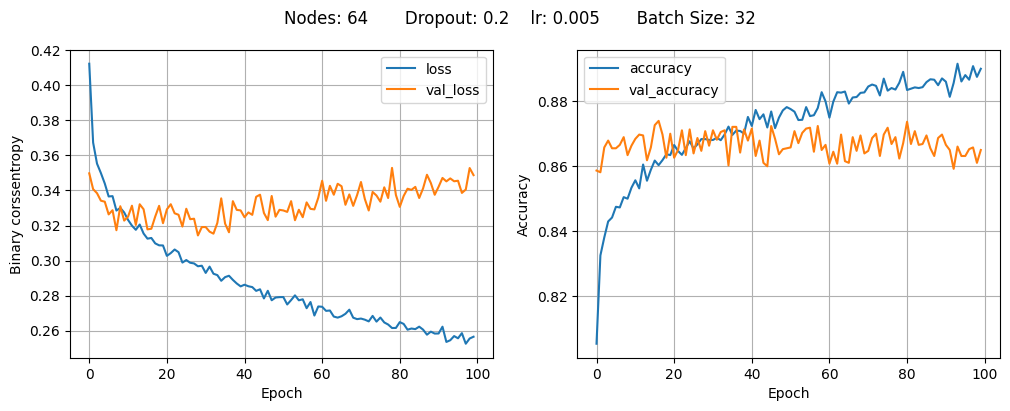

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.8733 - loss: 0.3390


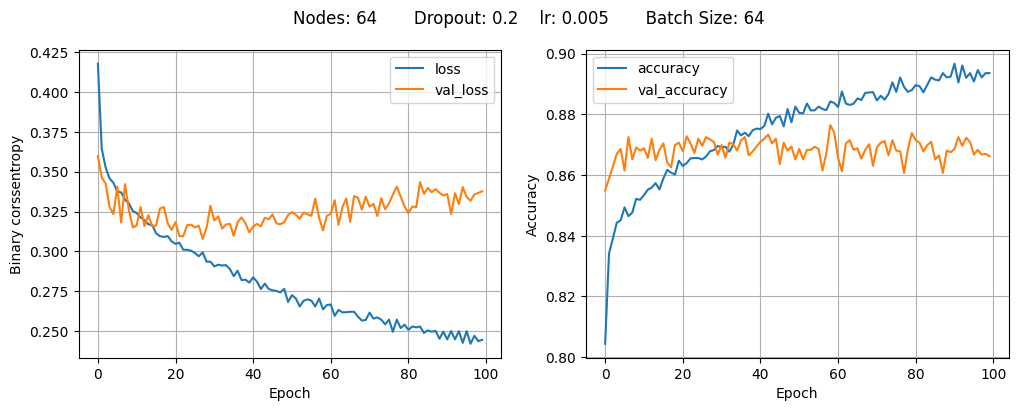

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.8737 - loss: 0.3281


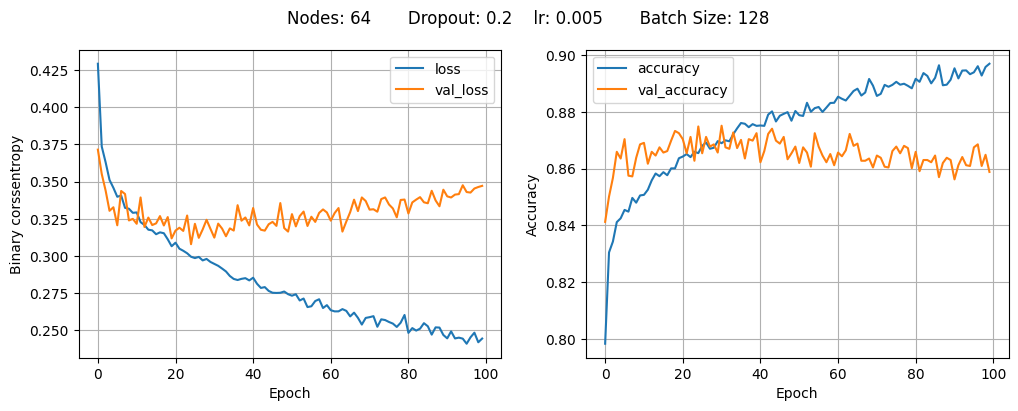

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8719 - loss: 0.3358


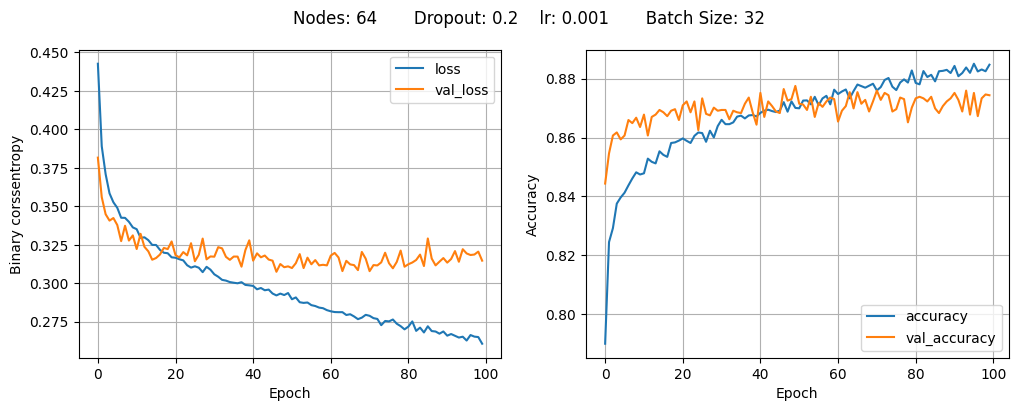

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.8870 - loss: 0.3039


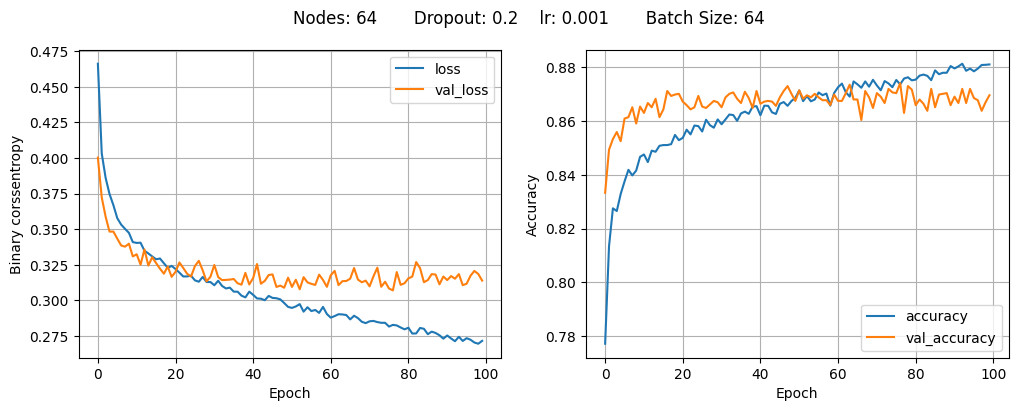

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.8769 - loss: 0.3065


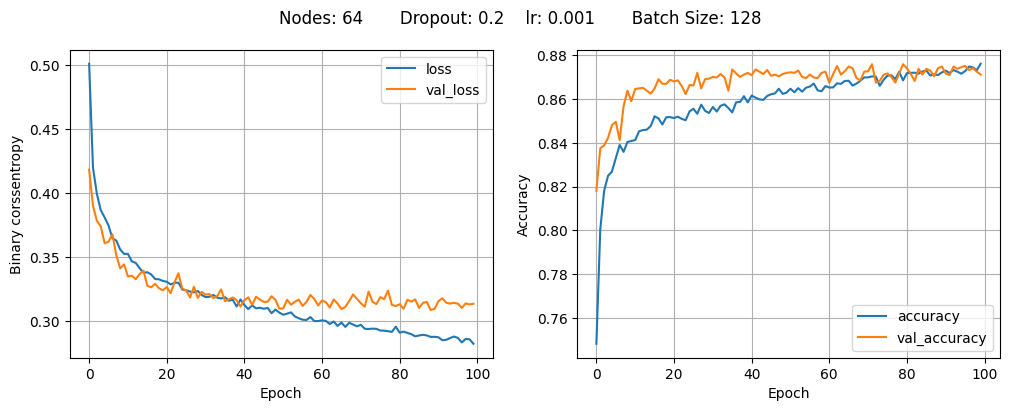

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.8763 - loss: 0.3054


In [215]:
# Note this takes a long time to compute!
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                title = f"Nodes: {num_nodes}\tDropout: {dropout_prob}\tlr: {lr}\tBatch Size: {batch_size}".expandtabs()
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history, title)
                val_loss = model.evaluate(X_valid, y_valid)[0] #model.evaluate returns a list
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [216]:
least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step


In [217]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1333
           1       0.89      0.90      0.89      2471

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



***

# Linear Regression

Best fit line
$$ y = b_0 + b_1x $$

$b_0$ is the $y$ intercept of the line at $x=0$ and $b_1$ is the slope of the line

### Residual/Error

Distance between $y_i$ and $\hat{y}_i$. Best fit for the line is to decrease the residual as much as possible.
$$ |y_i - \hat{y}_i| $$

Decrease the residuals
Sum of square residuals

$$ \sum_i{|y_i - \hat{y}_i|^2} $$

Simple Linear Regresion: $$ y = b_0 + b_1x $$
Multiple Linear Regresion: $$ y = b_0 + b_1x_1 + b_2x_2 +b_3x_3 + \dots + b_nx_n $$

Residual plot is the plot of $|y_i - \hat{y}_i|$
#### Assumptions
- Linearity: data must be linear
- Independence: All samples must be independent
- Normality: residuals must be normally distributed
- Homostochasticity: Variance of residuals must be constant

### Mean Absolute Error (MAE)
Sum all the absolute residuals and divide by the number of points
$$ MAE = \frac{\sum_{i=0}^n{|y_i - \hat{y}_i|}}{n} $$

### Mean Squared Error
Sum all the squared residuals and divide by the number of points
$$ MSE = \frac{\sum_{i=0}^n{|y_i - \hat{y}_i|^2}}{n} $$

Mean squared errors helps us punish large errors in the prediction (quadratic equations are differentiable, absolute values are not)

### Root Mean Squared Error
Sum all the squared residuals and divide by the number of points
$$ RMSE = \sqrt{\frac{\sum_{i=0}^n{|y_i - \hat{y}_i|^2}}{n}} $$

### $R^2$ Coefficient of determination

$$ R^2 = 1-\frac{RSS}{TSS} $$

RSS: Sum of squared residuals
$$ \sum_i{|y_i - \hat{y}_i|^2} $$

TSS: total sum of sqaures
$$ \sum_i{|y_i - \bar{y}|^2} $$
Where $\bar{y}$ is the average $y$ value

In [218]:
import copy
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [219]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

In [220]:
df.head()
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)


In [221]:
df.head()

bike_count  temp  humidity  wind  visibility  dew_pt_temp  radiation  \
12          449   1.7        23   1.4        2000        -17.2       1.11   
36          479   4.3        41   1.3        1666         -7.8       1.09   
60          333   5.8        85   1.7         349          3.4       0.43   
84          393  -0.3        38   4.8        1823        -12.9       1.11   
108         321  -2.3        25   0.0        1962        -19.7       0.00   

     rain  Snow  functional  
12    0.0   0.0           1  
36    0.0   0.0           1  
60    0.0   0.0           1  
84    0.0   0.0           1  
108   0.0   0.0           1

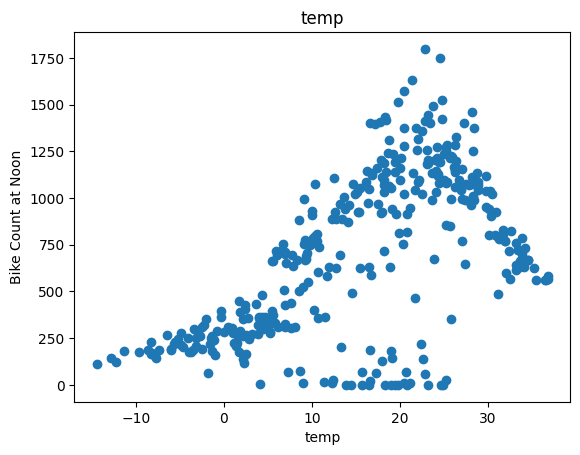

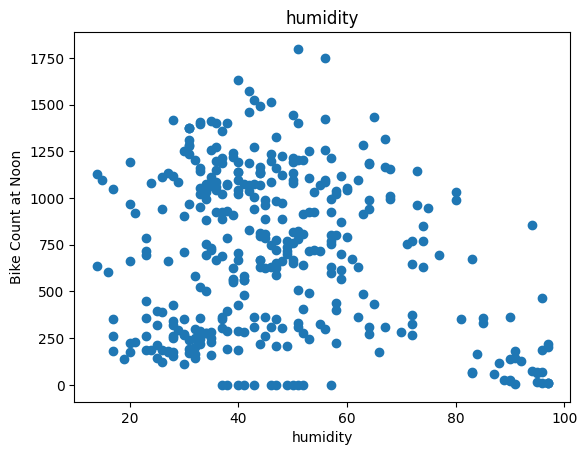

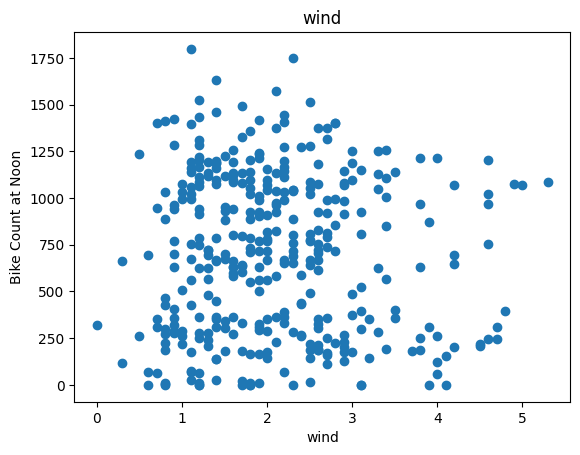

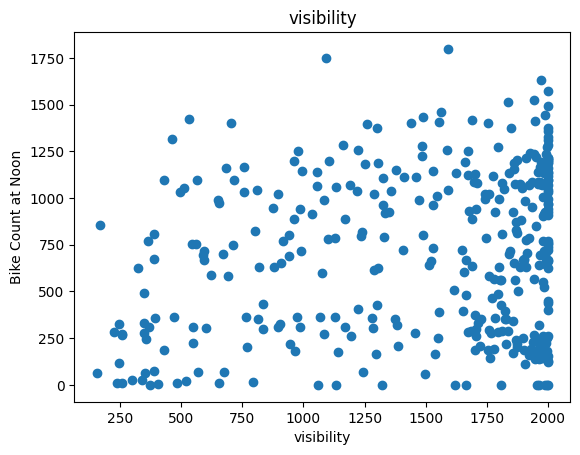

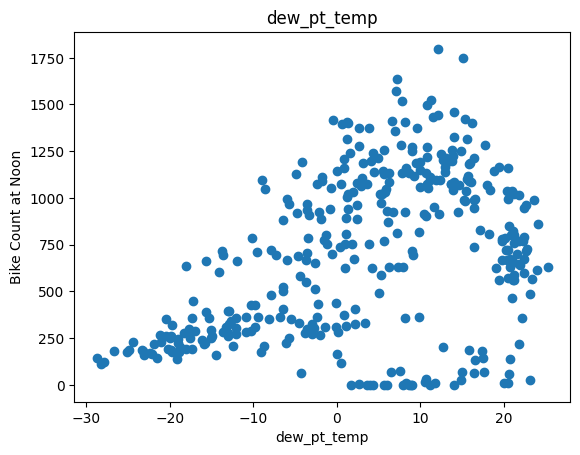

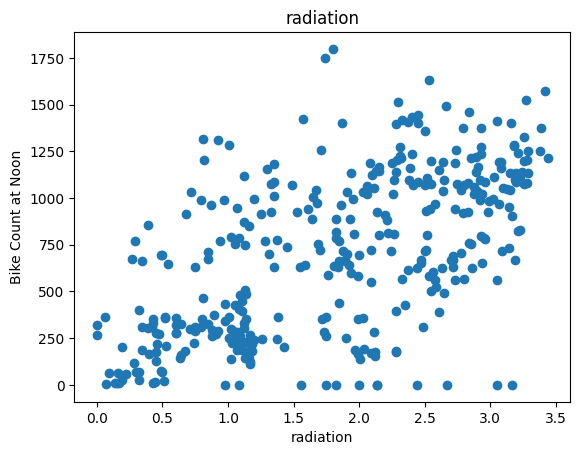

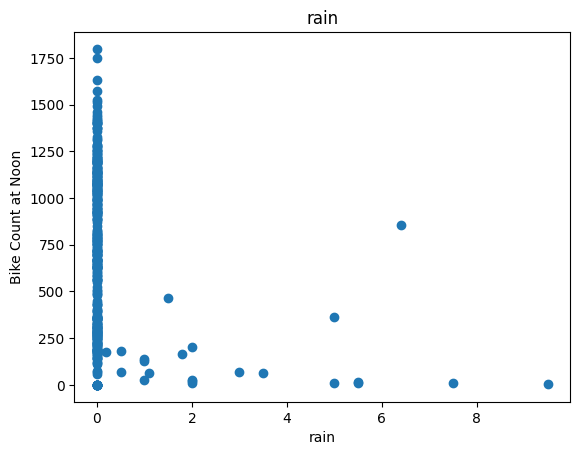

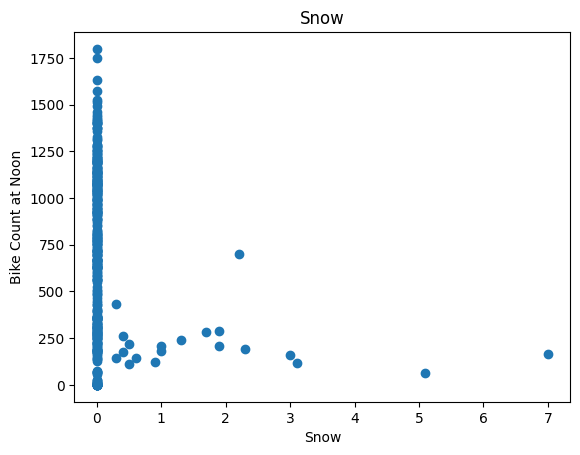

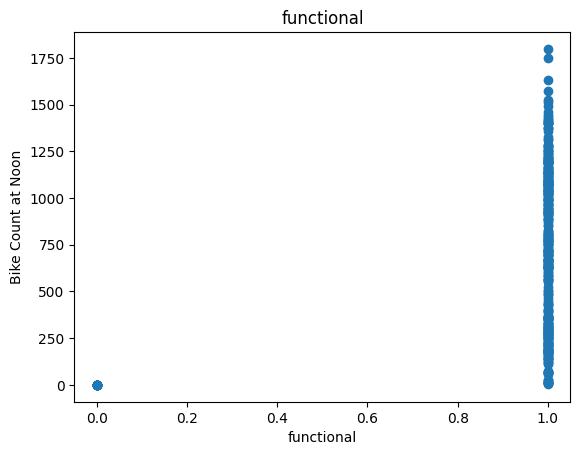

In [222]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike Count at Noon")
    plt.xlabel(label)
    plt.show()

In [223]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [224]:
df.head()

bike_count  temp  humidity  dew_pt_temp  radiation  rain  Snow
12          449   1.7        23        -17.2       1.11   0.0   0.0
36          479   4.3        41         -7.8       1.09   0.0   0.0
60          333   5.8        85          3.4       0.43   0.0   0.0
84          393  -0.3        38        -12.9       1.11   0.0   0.0
108         321  -2.3        25        -19.7       0.00   0.0   0.0

In [225]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\Prajwal Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [226]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values
    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))
    return data, X, y
    

In [227]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [228]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [229]:
print(temp_reg.coef_, temp_reg.intercept_)

[[21.29242043]] [370.89078579]


In [230]:
temp_reg.score(X_test_temp, y_test_temp)

0.2367054854912588

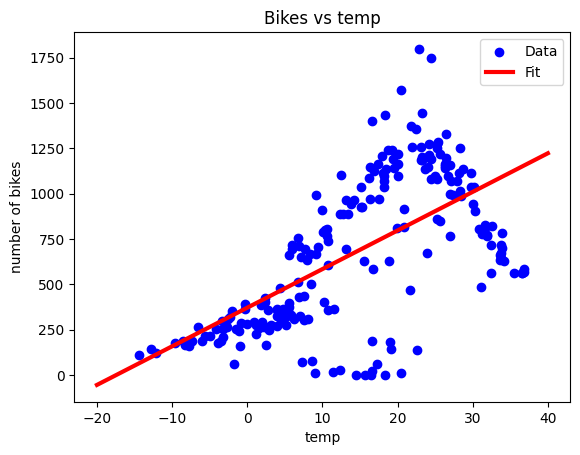

In [231]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = np.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(x.reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("number of bikes")
plt.xlabel("temp")
plt.show()

In [251]:
# Multiple linear regression

train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

c:\Users\Prajwal Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [233]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [234]:
all_reg.score(X_test_all, y_test_all)

0.5351599381831467

In [235]:
# regression with a neural net

temp_normalizer = keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

c:\Users\Prajwal Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [236]:
temp_nn_model = keras.Sequential([
    temp_normalizer,
    keras.layers.Dense(1)
])

In [237]:
temp_nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error")

In [238]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

In [239]:
history = temp_nn_model.fit(X_train_temp.reshape(-1), y_train_temp, verbose=0, epochs=1000, validation_data=(X_val_temp, y_val_temp))

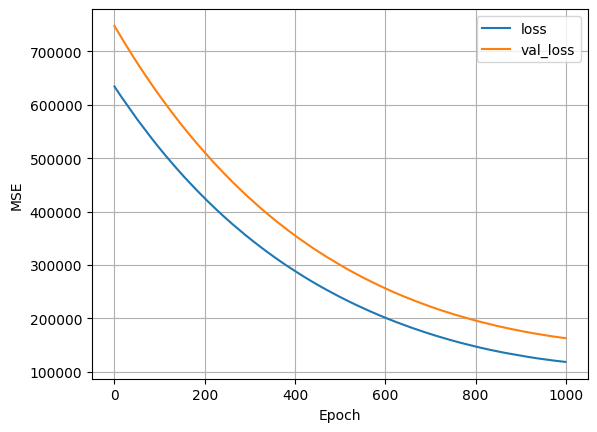

In [240]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


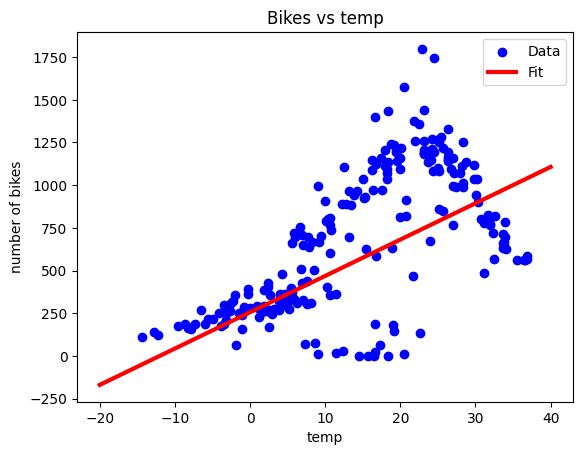

In [241]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = np.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(x.reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("number of bikes")
plt.xlabel("temp")
plt.show()

In [242]:
# Multiple linear regressor
## Implement yourself

In [243]:
temp_normalizer = keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
nn_model = keras.Sequential([
    temp_normalizer,
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)
])

nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [244]:
history = nn_model.fit(X_train_temp, y_train_temp, epochs=100, verbose=0, validation_data=(X_val_temp, y_val_temp))

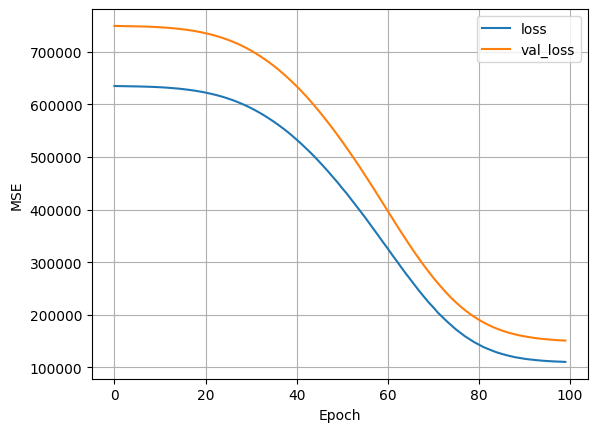

In [245]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


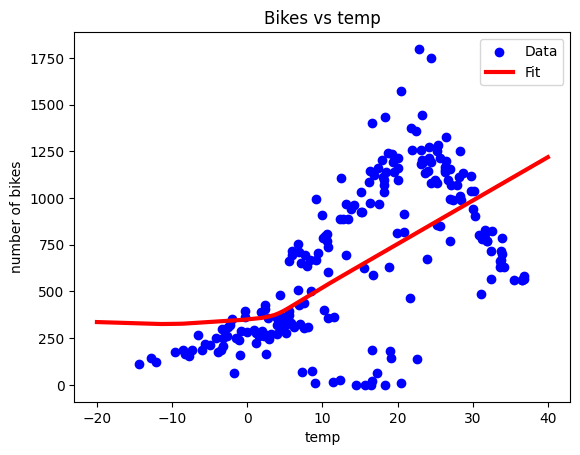

In [246]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = np.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(x.reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("number of bikes")
plt.xlabel("temp")
plt.show()

In [259]:
all_normalizer = keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)
nn_model_all = keras.Sequential([
    all_normalizer,
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)
])

nn_model_all.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

c:\Users\Prajwal Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [262]:
history = nn_model_all.fit(X_train_all, y_train_all, epochs=100, verbose=0, validation_data=(X_val_all, y_val_all))

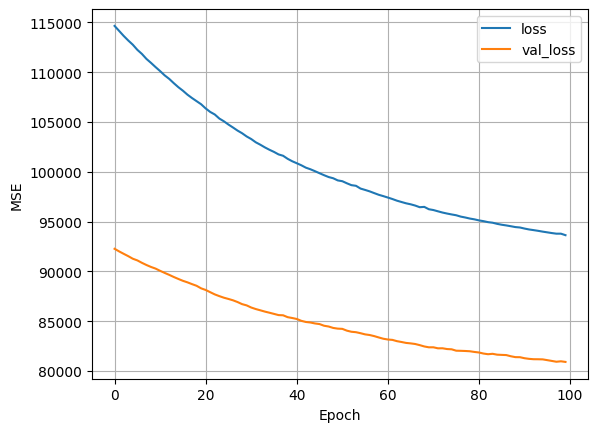

In [263]:
plot_loss(history)

In [264]:
# Calculate MSE for linear and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model_all.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [267]:
def MSE(y_pred_lr, y_real):
    return np.square(y_pred_lr - y_real).mean()

In [268]:
MSE(y_pred_lr, y_test_all)

113022.8572945122

In [269]:
MSE(y_pred_nn, y_test_all)

128642.62498247113

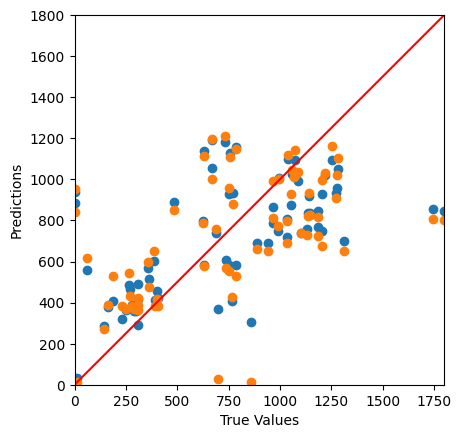

In [271]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, c="red")

***

# K-Means Clustering
1. Choose $n$ random points to be centroids
2. Calculate distance between points and centroid, assign points to closest centroid
3. Compute new centroids

# Principal Component Analysis
Map all the projects to a lower dimensional space which is produced with the largest variance of the points.
The dimension with the largest variance is the dimension that minimizes the residuals. (projected point on that space) ### This is not the residuals discussed in Linear regression

1. Minimize projection residuals
2. Maximize variance

In [275]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv("seeds_dataset.txt", names=cols, sep="\s+")

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Prajwal Rao\AppData\Local\Temp\ipykernel_49284\2436742721.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("seeds_dataset.txt", names=cols, sep="\s+")


In [276]:
df.head()

area  perimeter  compactness  length  width  asymmetry  groove  class
0  15.26      14.84       0.8710   5.763  3.312      2.221   5.220      1
1  14.88      14.57       0.8811   5.554  3.333      1.018   4.956      1
2  14.29      14.09       0.9050   5.291  3.337      2.699   4.825      1
3  13.84      13.94       0.8955   5.324  3.379      2.259   4.805      1
4  16.14      14.99       0.9034   5.658  3.562      1.355   5.175      1

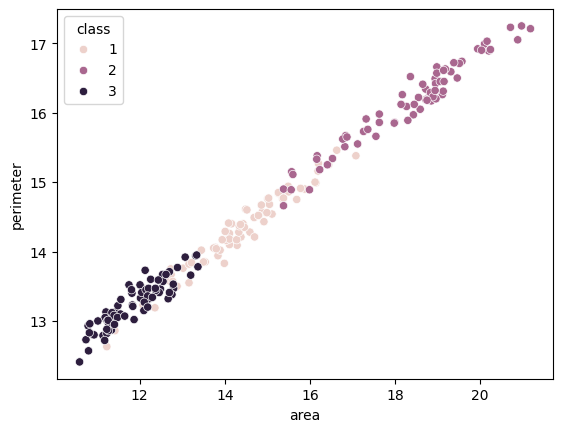

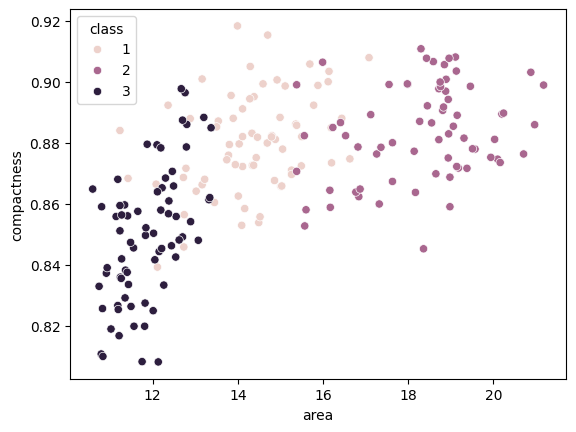

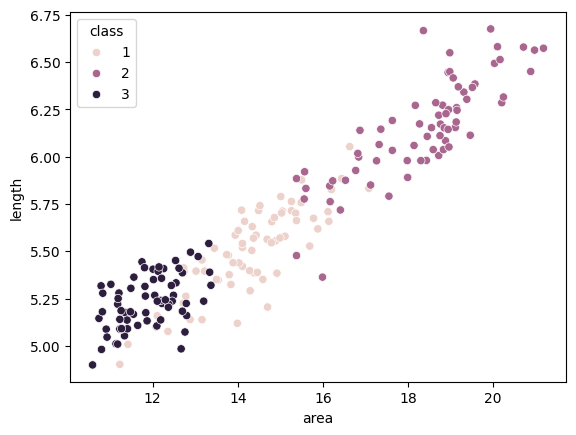

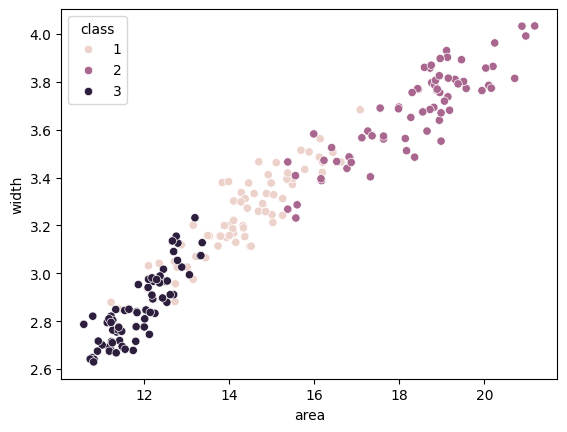

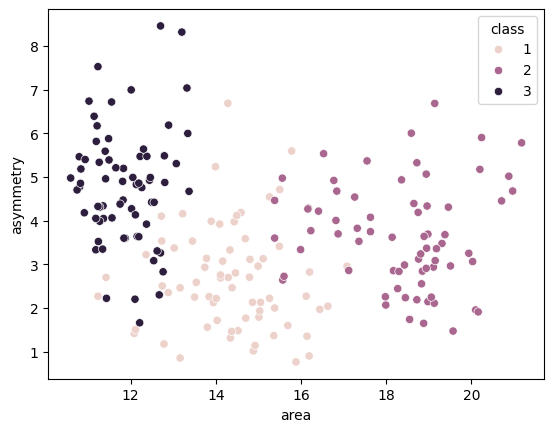

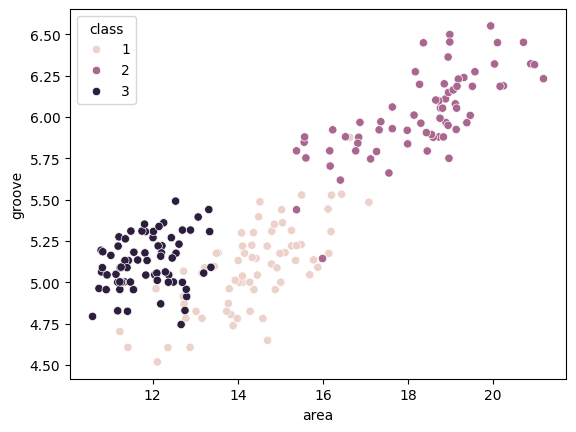

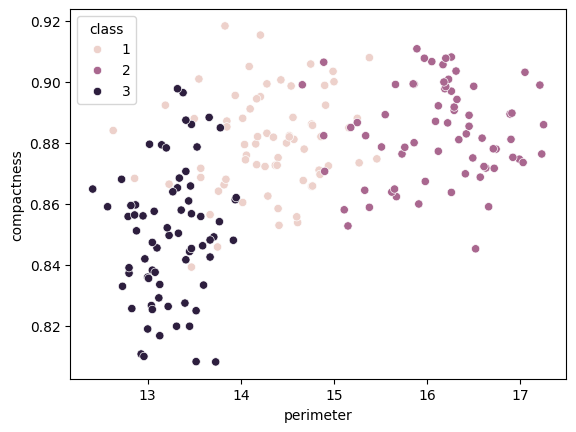

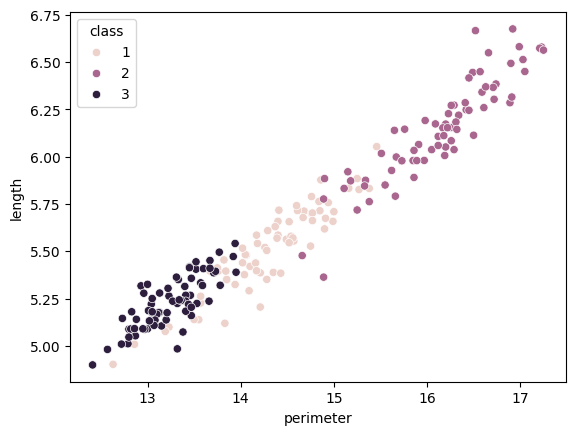

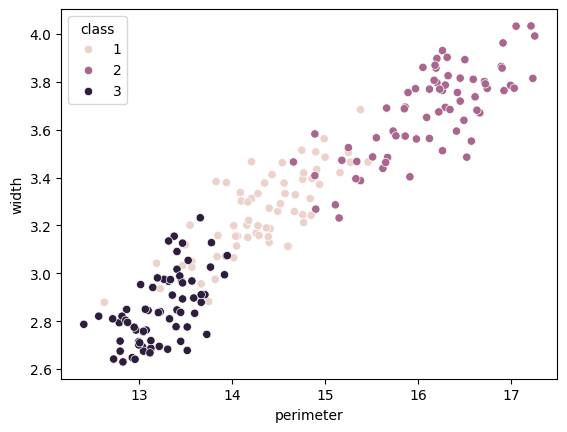

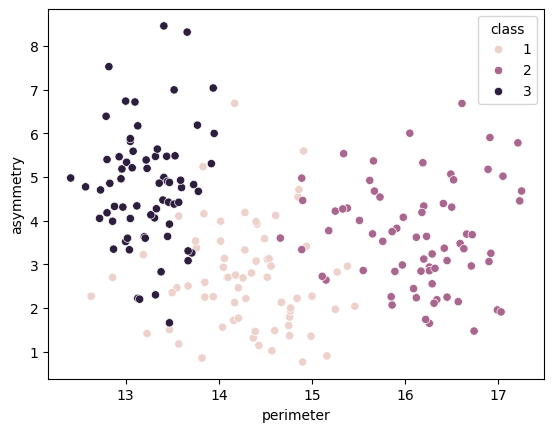

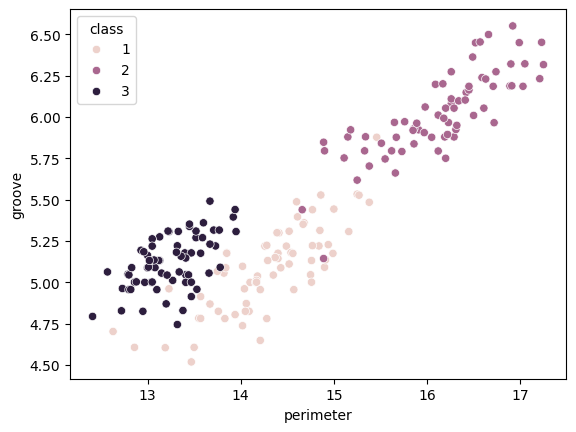

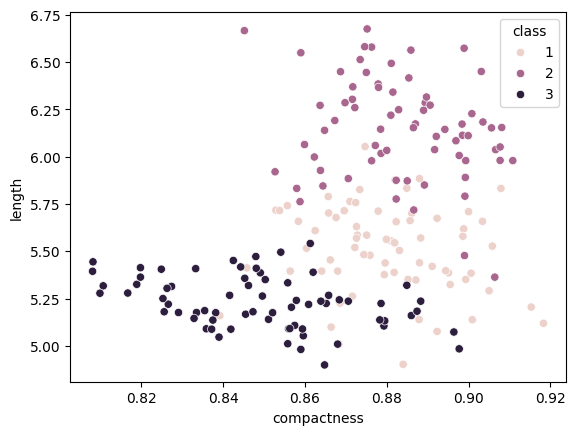

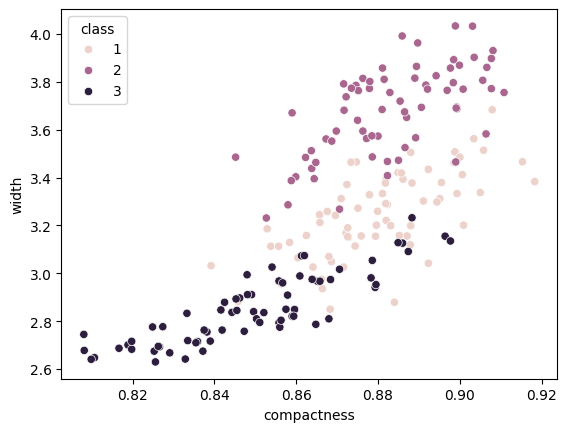

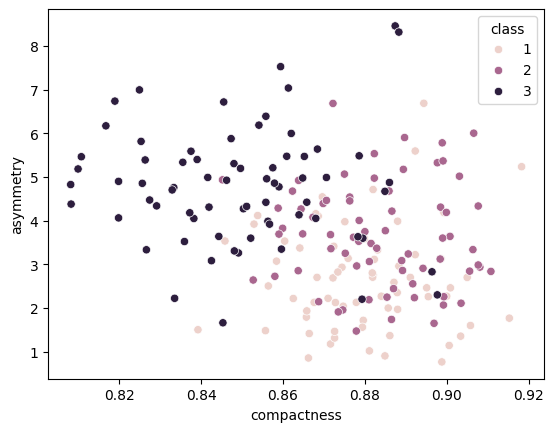

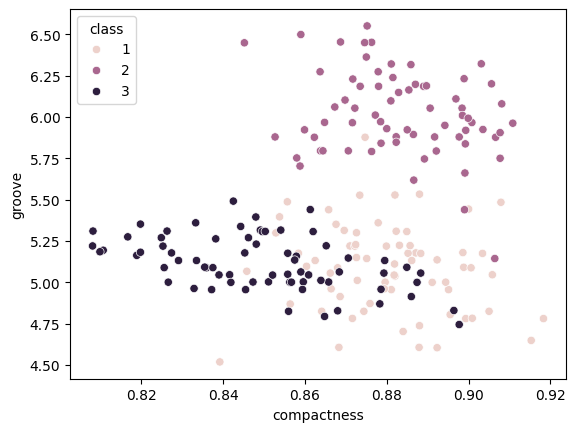

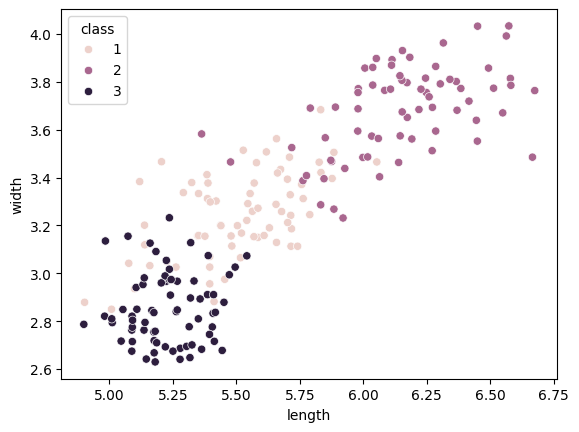

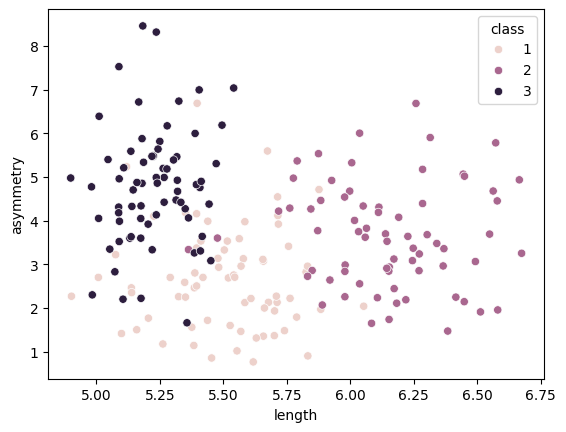

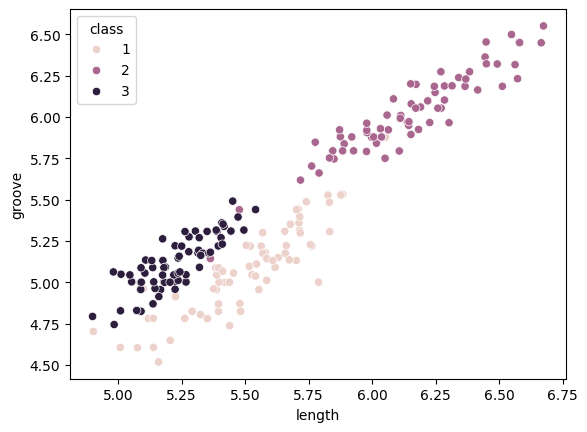

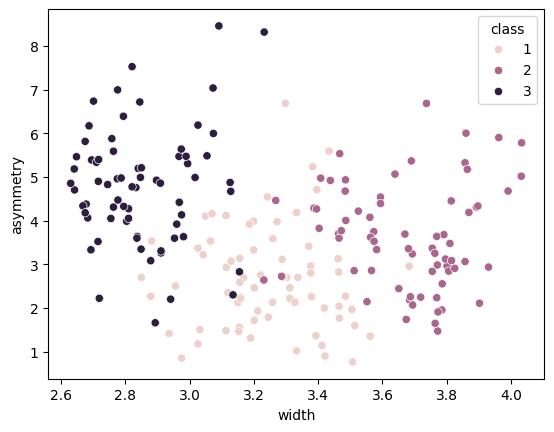

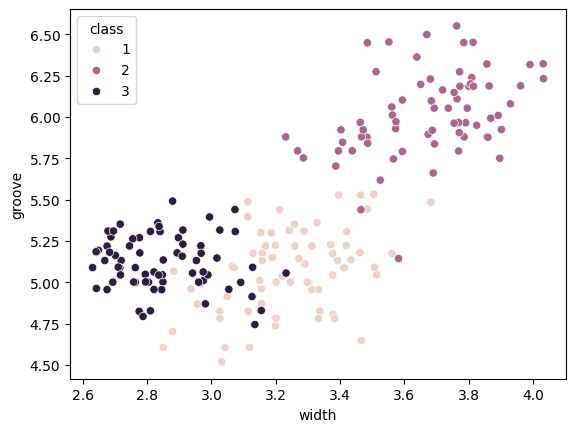

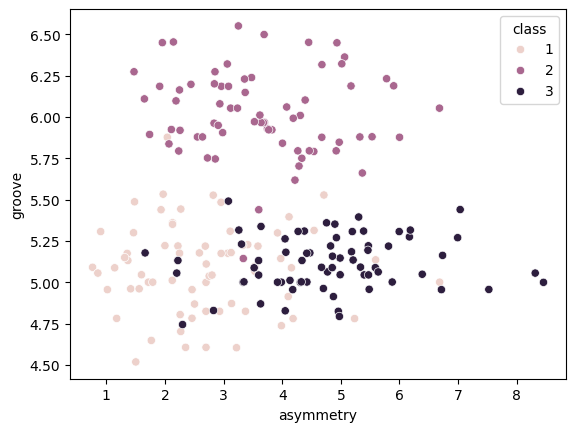

In [277]:
for i in range(len(cols) -1):
    for j in range(i+1, len(cols)-1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label, y=y_label, data=df, hue="class")
        plt.show()

In [278]:
from sklearn.cluster import KMeans

In [279]:
x = "perimeter"
y = "asymmetry"
X = df[[x, y]].values

In [280]:
kmeans = KMeans(n_clusters=3).fit(X)

In [282]:
clusters = kmeans.labels_
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [283]:
df["class"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [284]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "class"])

<Axes: xlabel='perimeter', ylabel='asymmetry'>

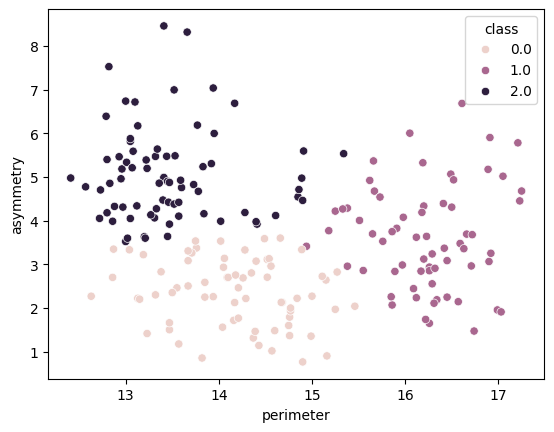

In [287]:
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)

<Axes: xlabel='perimeter', ylabel='asymmetry'>

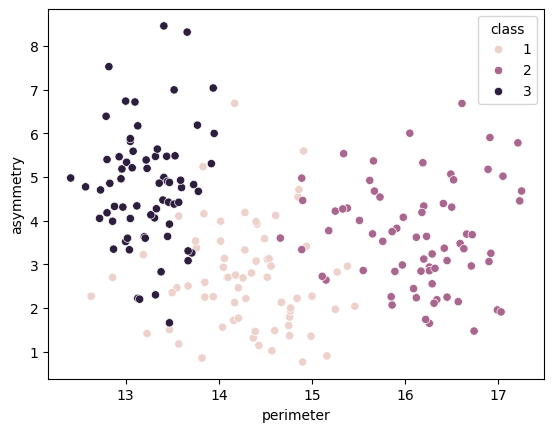

In [288]:
sns.scatterplot(x=x, y=y, hue="class", data=df)

# For higher dimensions

In [289]:
X = df[cols[:-1]].values

In [291]:
kmeans = KMeans(n_clusters=3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=df.columns)

<Axes: xlabel='perimeter', ylabel='asymmetry'>

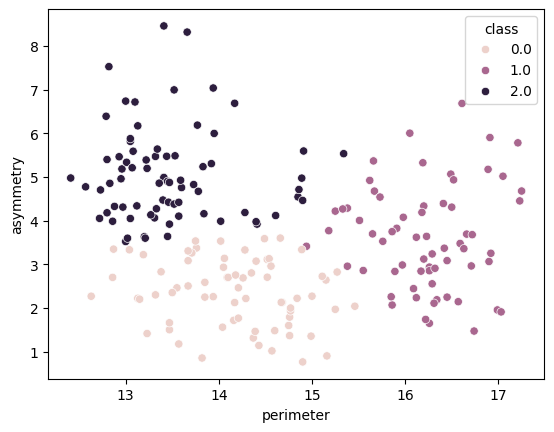

In [292]:
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)

<Axes: xlabel='perimeter', ylabel='asymmetry'>

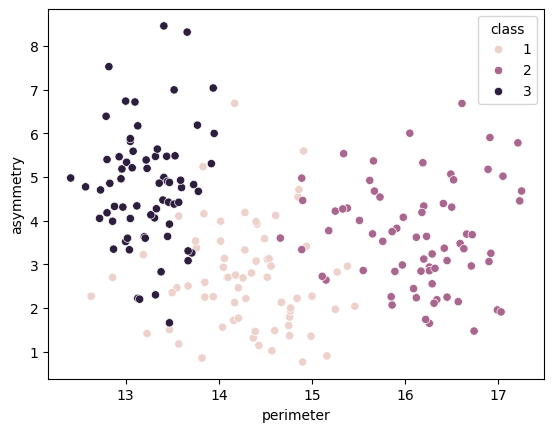

In [293]:
sns.scatterplot(x=x, y=y, hue="class", data=df)

# PCA

In [294]:
from sklearn.decomposition import PCA

In [295]:
pcs = PCA(n_components=2)
transformed_x = pcs.fit_transform(X)

In [296]:
X.shape

(210, 7)

In [297]:
transformed_x.shape

(210, 2)

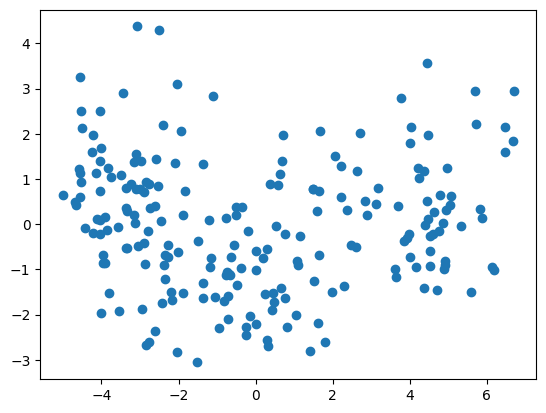

In [300]:
plt.scatter(transformed_x[:, 0], transformed_x[:,1])

In [301]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

In [302]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df['class'].values.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

<Axes: xlabel='pca1', ylabel='pca2'>

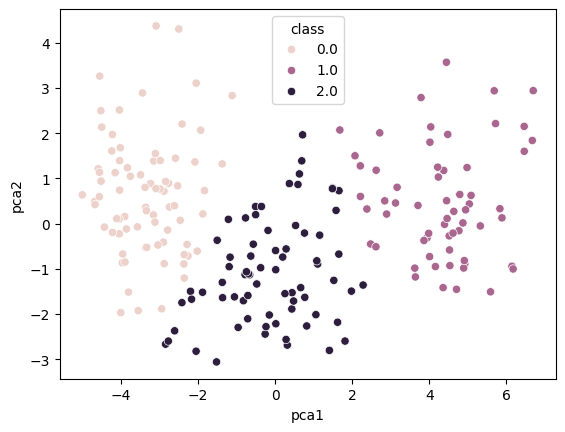

In [303]:
sns.scatterplot(x="pca1", y="pca2", hue='class', data=kmeans_pca_df)

<Axes: xlabel='pca1', ylabel='pca2'>

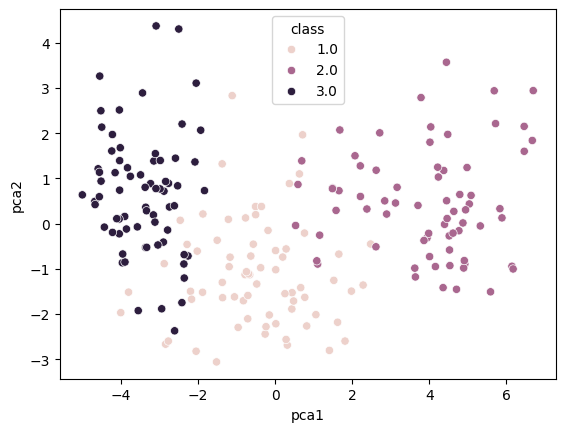

In [304]:
sns.scatterplot(x="pca1", y="pca2", hue='class', data=truth_pca_df)